## 6.1 로지스틱 회귀분석

로지스틱(Logistic) 회귀분석은 회귀분석이라는 명칭과 달리 회귀분석 문제와 분류문제 모두에 사용할 수 있다. 로지스틱 회귀분석 모형에서는 종속변수가 이항분포를 따르고 그 모수 $\mu$가 독립변수 $x$에 의존한다고 가정한다.

$$ p(y \mid x) = \text{Bin} (y; \mu(x), N) $$

위 식에서 보듯이 로지스틱 함수는 $y$의 값이 특정한 구간내의 값($0 \sim N$)만 가질 수 있기 때문에 종속변수가 이러한 특성을 가진 경우에 회귀분석 방법으로 쓸 수 있다.  

또는 이항 분포의 특별한 경우($N=1$)로 $y$가 베르누이 확률분포인 경우도 있을 수 있다. 여기에서는 베르누이 확률분포를 따르는 로지스틱 회귀분석만 고려하기로 한다.

$$ p(y \mid x) = \text{Bern} (y; \mu(x) )$$

종속변수 $y$가 0또는 1인 분류 예측 문제를 풀 때는 $x$ 값을 이용하여 $\mu(x)$를 예측한 후 다음 기준에 따라 $\hat{y}$값을 출력한다.

$$ \hat{y} = \begin{cases} 1 & \text{ if } \mu(x) \geq 0.5 \\ 0 & \text{ if } \mu(x) < 0.5 \end{cases} $$

회귀분석을 할 때는 $\hat{y}$으로 $y=1$이 될 확률값 $\mu(x)$를 직접 사용한다.

$$ \hat{y} = \mu(x) $$

### 시그모이드함수

로지스틱 회귀모형에서는 베르누이 확률분포의 모수 $\mu$가 $x$의 함수라고 가정한다. $\mu(x)$는 $x$에 대한 함수를 0부터 1사이의 값만 나올 수 있도록 **시그모이드함수(sigmoid function)**라는 함수를 사용하여 변형한 것을 사용한다.

시그모이드함수는 종속변수의 모든 실수 값에 대해 

* 유한한 구간 $(a,b)$ 사이의 한정된(bounded) 값을 가지고
$$ a < f(x) < b $$
* 항상 양의 기울기를 가지는 단조증가하는
$$ a > b \; \rightarrow \; f(a) > f(b) $$

함수의 집합을 말한다. 실제로는 다음과 같은 함수들이 주로 사용된다.

 * 로지스틱(Logistic)함수 
 
$$ \text{logitstic}(z) = \sigma(z) = \dfrac{1}{1+\exp{(-z)}} $$
 
 * 하이퍼볼릭탄젠트(Hyperbolic tangent)함수 
 
$$ \tanh(z) = \frac{\sinh z}{\cosh z} = \frac{(e^z - e^{-z})/2}{(e^z + e^{-z})/2} = 2 \sigma(2z) - 1$$

 * 오차(Error)함수
 
$$ \text{erf}(z) = \frac{2}{\sqrt\pi}\int_0^z e^{-t^2}\,dt $$
 

하이퍼볼릭탄젠트함수는 로지스틱함수를 위아래 방향으로 2배 늘리고 좌우 방향으로 1/2로 축소한 것과 같다. 

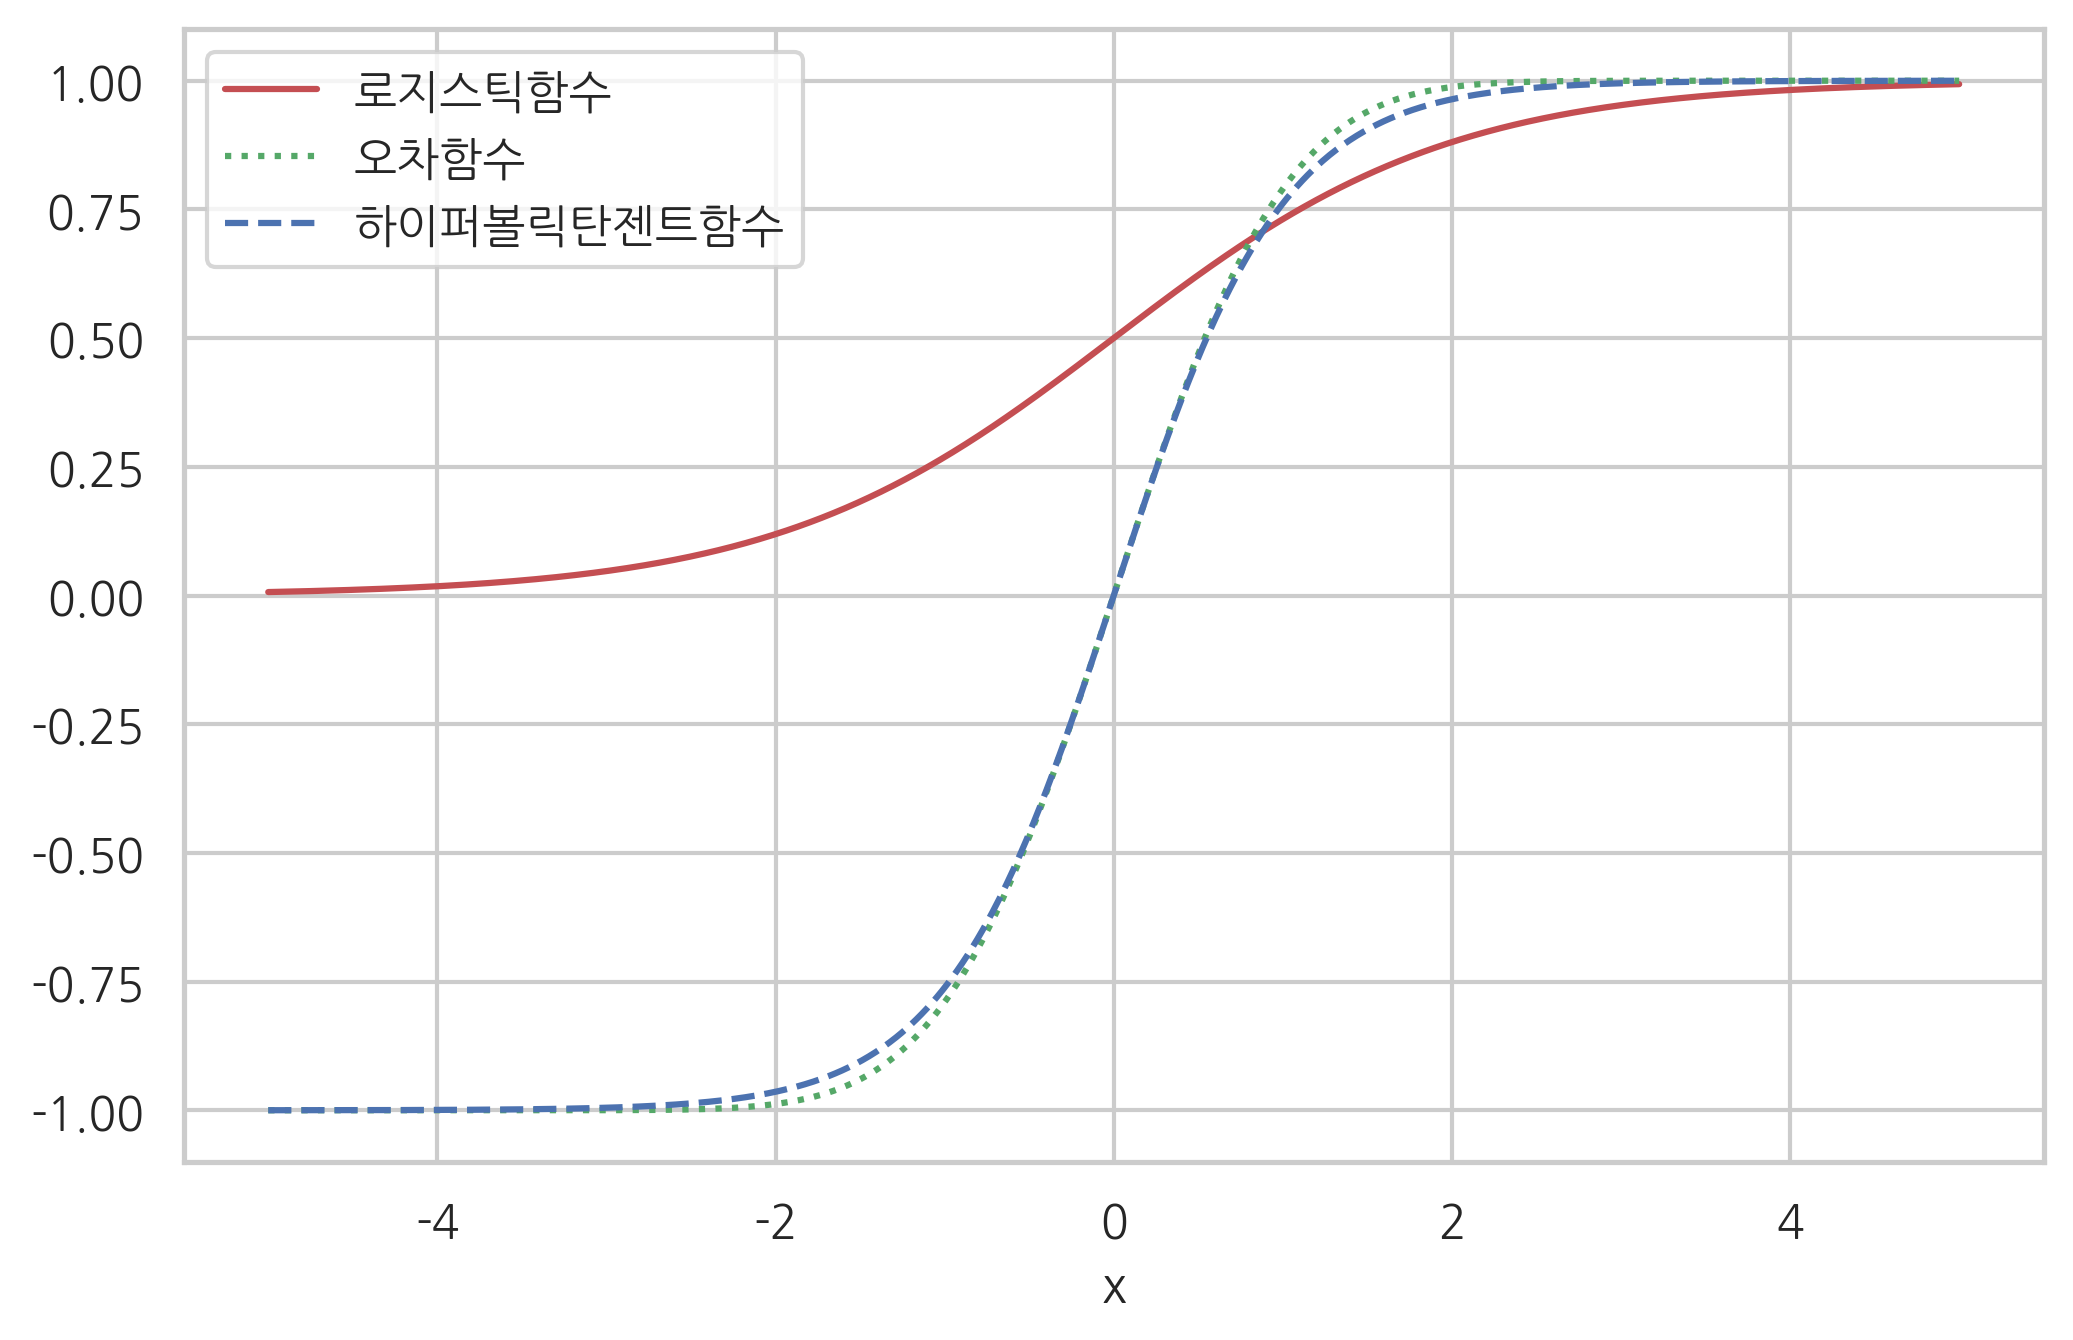

In [1]:
xx = np.linspace(-5, 5, 1000)
plt.plot(xx, 1/(1+np.exp(-xx)), 'r-', label="로지스틱함수")
plt.plot(xx, sp.special.erf(0.5*np.sqrt(np.pi)*xx), 'g:', label="오차함수")
plt.plot(xx, np.tanh(xx), 'b--', label="하이퍼볼릭탄젠트함수")
plt.ylim([-1.1, 1.1])
plt.legend(loc=2)
plt.xlabel("x")
plt.show()

### 로지스틱함수

로지스틱함수는 음의 무한대부터 양의 무한대까지의 실수값을 0부터 1사이의 실수값으로 1 대 1 대응시키는 시그모이드함수다. 보통 시그모이드함수라고 하면 로지스틱함수를 가리킨다. 로지스틱함수는 다음 과정을 통해 정의되었다.

베르누이 시도에서 1이 나올 확률 $\mu$와 0이 나올 확률 $1-\mu$의 비율(ratio)을 승산비(odds ratio)라고 한다.

$$ \text{odds ratio} = \dfrac{\mu}{1-\mu} $$

0부터 1사이의 값만 가지는 $\mu$를 승산비로 변환하면 0부터 양의 무한대까지의 값을 가질 수 있다.

승산비를 로그 변환한 것이 로지트함수(Logit function)다.

$$ z = \text{logit}(\text{odds ratio}) = \log \left(\dfrac{\mu}{1-\mu}\right) $$ 

로지트함수의 값은 로그 변환에 의해 음의 무한대($-\infty$)부터 양의 무한대($\infty$)까지의 값을 가질 수 있다.

로지스틱함수(Logistic function)는 로지트함수의 역함수이다. 즉 **음의 무한대($-\infty$)부터 양의 무한대($\infty$)까지의 값을 가지는 입력변수를 0부터 1사의 값을 가지는 출력변수로 변환**한 것이다.

$$ \text{logitstic}(z) = \mu(z) = \dfrac{1}{1+\exp{(-z)}} $$  

### 선형 판별함수

로지스틱함수 $\sigma(z)$를 사용하는 경우에는 $z$값과 $\mu$값은 다음과 같은 관계가 있다.

* $z = 0$일 때 $\mu = 0.5$
* $z > 0$일 때 $\mu > 0.5 \; \rightarrow \hat{y} = 1$
* $z < 0$일 때 $\mu < 0.5 \; \rightarrow \hat{y} = 0$

즉 $z$가 분류 모형의 판별함수(decision function)의 역할을 한다. 로지스틱 회귀분석에서는 판별함수 수식으로 선형함수를 사용한다.

$$ z = w^Tx  $$

따라서 판별 경계면도 선형이 된다.

### 로지스틱 회귀분석 모형의 모수 추정

로지스틱 회귀분석 모형의 모수 $w$는 최대가능도(Maximum Likelihood Estimation, MLE)방법으로 추정할 수 있다.

우선 베르누이분포의 확률밀도함수는 다음과 같다.

$$ p(y \mid x) = \text{Bern} (y;\mu(x;w) ) = \mu(x;w)^y ( 1 - \mu(x;w) )^{1-y} $$

$\mu$는 $w^Tx$에 로지스틱함수를 적용한 값이다.

$$
\mu(x;w) = \dfrac{1}{1 + \exp{(-w^Tx)}}
$$

이 식을 대입하면 조건부 확률은 다음과 같다.

$$ 
\begin{eqnarray}
p(y \mid x) 
&=& \left(  \dfrac{1}{1 + \exp{(-w^Tx)}} \right) ^y \left(  1 - \dfrac{1}{1 + \exp{(-w^Tx)}} \right) ^{1-y} \\
&=& \left(  \dfrac{1}{1 + \exp{(-w^Tx)}} \right) ^y \left( \dfrac{\exp{(-w^Tx)}}{1 + \exp{(-w^Tx)}} \right) ^{1-y} \\
\end{eqnarray}
$$


데이터 표본이 $\{ x_i, y_i \}_{1:N}$로 여러 개 있는 경우 전체 데이터의 로그가능도 ${LL}$를 구하면 다음과 같다.

베르누이 확률분포의 정의에서

$$
\begin{eqnarray}
{LL} 
&=& \log \prod_{i=1}^N \mu(x_i;w)^{y_i} (1-\mu(x_i;w))^{1-y_i} \\
&=& \sum_{i=1}^N \left( y_i \log\mu(x_i;w) +  (1-y_i)\log(1-\mu(x_i;w)) \right) \\
&=& \sum_{i=1}^N \left( y_i \log\left(\dfrac{1}{1 + \exp{(-w^Tx_i)}}\right) + (1-y_i)\log\left(\dfrac{\exp{(-w^Tx_i)}}{1 + \exp{(-w^Tx_i)}}\right) \right) \\
\end{eqnarray}
$$

가 된다.


로그가능도를 최대화하는 $w$ 값을 구하기 위해 모수로 미분한다.

$$ \dfrac{\partial{LL}}{\partial w}  = \sum_{i=1}^N \dfrac{\partial{LL}}{\partial \mu(x_i;w)} \dfrac{\partial\mu(x_i;w)}{\partial w} $$

$LL$을 $\mu$로 미분하면

$$
\dfrac{\partial{LL}}{\partial \mu(x_i;w)} =  \left( y_i \dfrac{1}{\mu(x_i;w)} - (1-y_i)\dfrac{1}{1-\mu(x_i;w)} \right) 
$$

$\mu$를 $w$로 미분하면

$$ 
\dfrac{\partial \mu(x_i;w)}{\partial w} 
= \dfrac{\partial}{\partial w} \dfrac{1}{1 + \exp{(-w^Tx_i)}} \ 
= \dfrac{\exp{(-w^Tx_i)}}{(1 + \exp{(-w^Tx_i)})^2} x_i \ 
= \mu(x_i;w)(1-\mu(x_i;w)) x_i 
$$


두 식을 곱하면 그레디언트 벡터의 수식을 구할 수 있다.

$$ 
\begin{eqnarray}
\dfrac{\partial {LL}}{\partial w} 
&=& \sum_{i=1}^N \left( y_i \dfrac{1}{\mu(x_i;w)} - (1-y_i)\dfrac{1}{1-\mu(x_i;w)} \right) \mu(x_i;w)(1-\mu(x_i;w)) x_i   \\
&=& \sum_{i=1}^N \big( y_i (1-\mu(x_i;w)) - (1-y_i)\mu(x_i;w)  \big)  x_i \\
&=& \sum_{i=1}^N \big( y_i  - \mu(x_i;w) \big) x_i \\
\end{eqnarray}
$$

그레디언트 벡터가 영벡터가 되는 모수의 값이 로그가능도를 최대화하는 값이다. 하지만 그레디언트 벡터 수식이 $w$에 대한 비선형 함수이므로 선형 모형과 같이 간단하게 그레디언트가 0이 되는 모수 $w$ 값에 대한 수식을 구할 수 없으며 수치적인 최적화 방법(numerical optimization)을 통해 반복적으로 최적 모수 $w$의 값을 구해야 한다.

### 수치적 최적화

로그가능도함수 $LL$을 최대화하는 것은 다음 목적함수를 최소화하는 것과 같다.

$$ J = -LL $$

최대경사도(Steepest Gradient Descent)방법을 사용하자.

그레디언트 벡터는
$$
g_k = \dfrac{d}{dw}(-LL)
$$

이고, 이 방향으로 스텝사이즈 $\eta_k$만큼 이동한다.

$$
\begin{eqnarray}
w_{k+1} 
&=& w_{k} - \eta_k g_k \\
&=& w_{k} + \eta_k \sum_{i=1}^N \big( y_i  - \mu(x_i; w_k) \big) x_i\\
\end{eqnarray}
$$


### StatsModels 패키지의 로지스틱 회귀

다음과 같은 1차원 독립변수를 가지는 분류문제를 풀어보자.

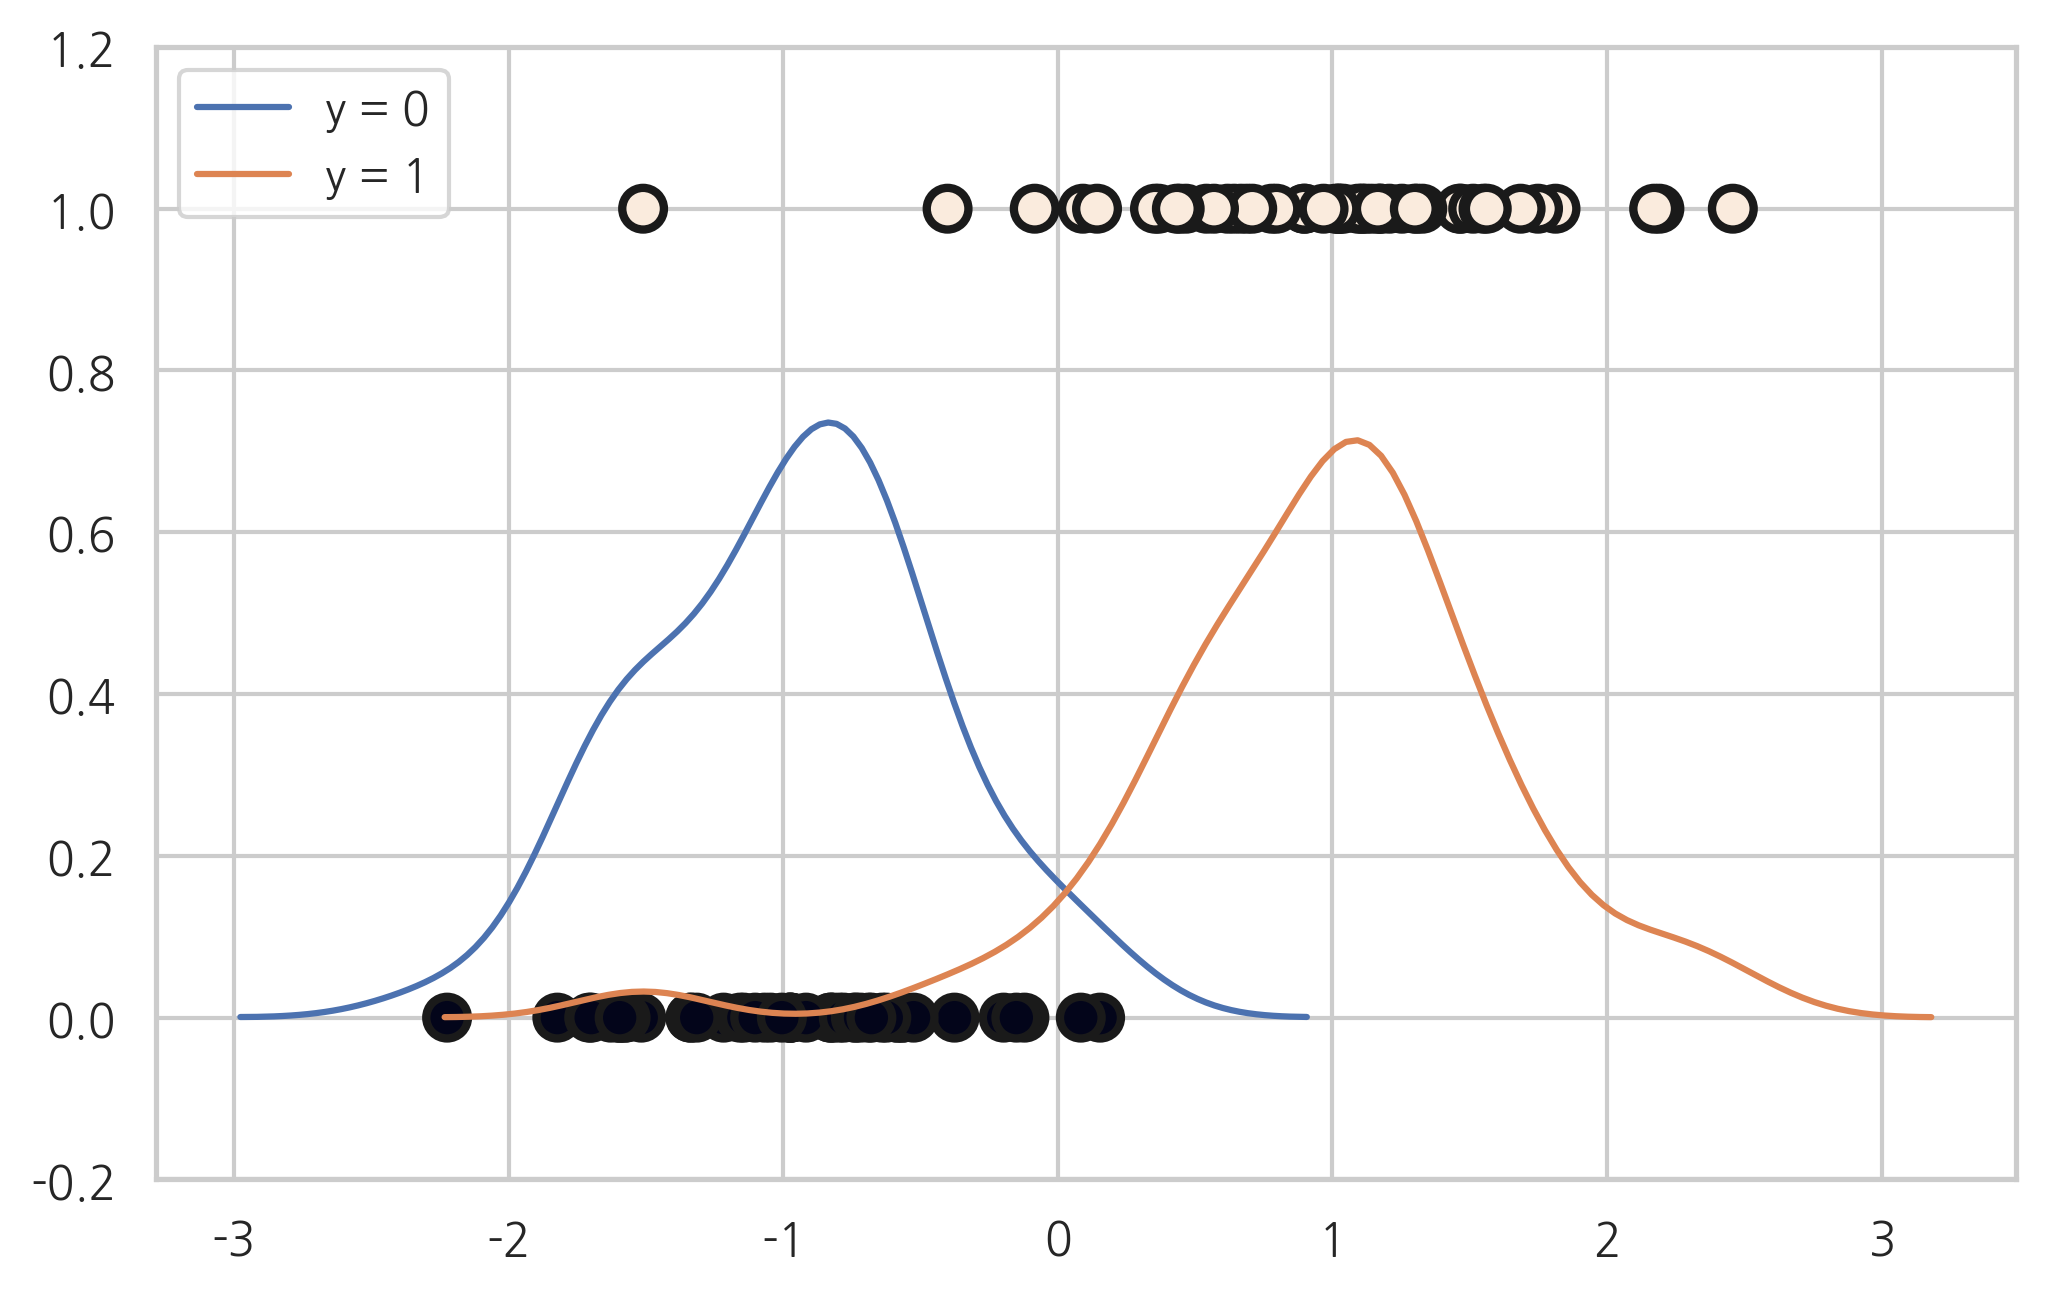

In [2]:
from sklearn.datasets import make_classification

X0, y = make_classification(n_features=1, n_redundant=0, n_informative=1,
                            n_clusters_per_class=1, random_state=4)

plt.scatter(X0, y, c=y, s=100, edgecolor="k", linewidth=2)
sns.distplot(X0[y == 0, :], label="y = 0", hist=False)
sns.distplot(X0[y == 1, :], label="y = 1", hist=False)
plt.ylim(-0.2, 1.2)
plt.show()

StatsModels 패키지는 베르누이 분포를 따르는 로지스틱 회귀 모형 `Logit` 를 제공한다. 사용방법은 `OLS` 클래스 사용법과 동일하다. 종속변수와 독립변수 데이터를 넣어 모형을 만들고 `fit` 메서드로 학습을 시킨다. `fit` 메서드의 `disp=0` 인수는 최적화 과정에서 문자열 메세지를 나타내지 않는 역할을 한다.

In [3]:
X = sm.add_constant(X0)
logit_mod = sm.Logit(y, X)
logit_res = logit_mod.fit(disp=0)
print(logit_res.summary())

                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                  100
Model:                          Logit   Df Residuals:                       98
Method:                           MLE   Df Model:                            1
Date:                Sat, 06 Jun 2020   Pseudo R-squ.:                  0.7679
Time:                        10:01:05   Log-Likelihood:                -16.084
converged:                       True   LL-Null:                       -69.295
Covariance Type:            nonrobust   LLR p-value:                 5.963e-25
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2515      0.477      0.527      0.598      -0.683       1.186
x1             4.2382      0.902      4.699      0.000       2.470       6.006


결과 객체에서 `summary` 메서드를 사용하여 리포트를 출력할 수 있다. 결과 리포트에서 판별함수의 수식이 다음과 같다는 것을 알 수 있다.

$$ 
\mu(x) = \sigma(4.2382x + 0.2515)
$$

따라서 $z$값의 부호를 나누는 기준값은 $4.2382x + 0.2515 = 0.5$가 되는 $x$값 즉, $(0.5-0.2515)/4.2382$다.

`predict` 메서드를 사용하면 $\mu(x)$값을 출력한다.



유의확률을 감안하면 상수항의 값은 0과 마찬가지이므로 $\mu(x)$가 다음과 같다고 볼 수도 있다.

$$ 
\mu(x) = \sigma(4.2382x)
$$

이렇게 생각하면 $z$값의 부호를 나누는 기준값은 실질적으로는 $0.5/4.2382=0.118$이다.


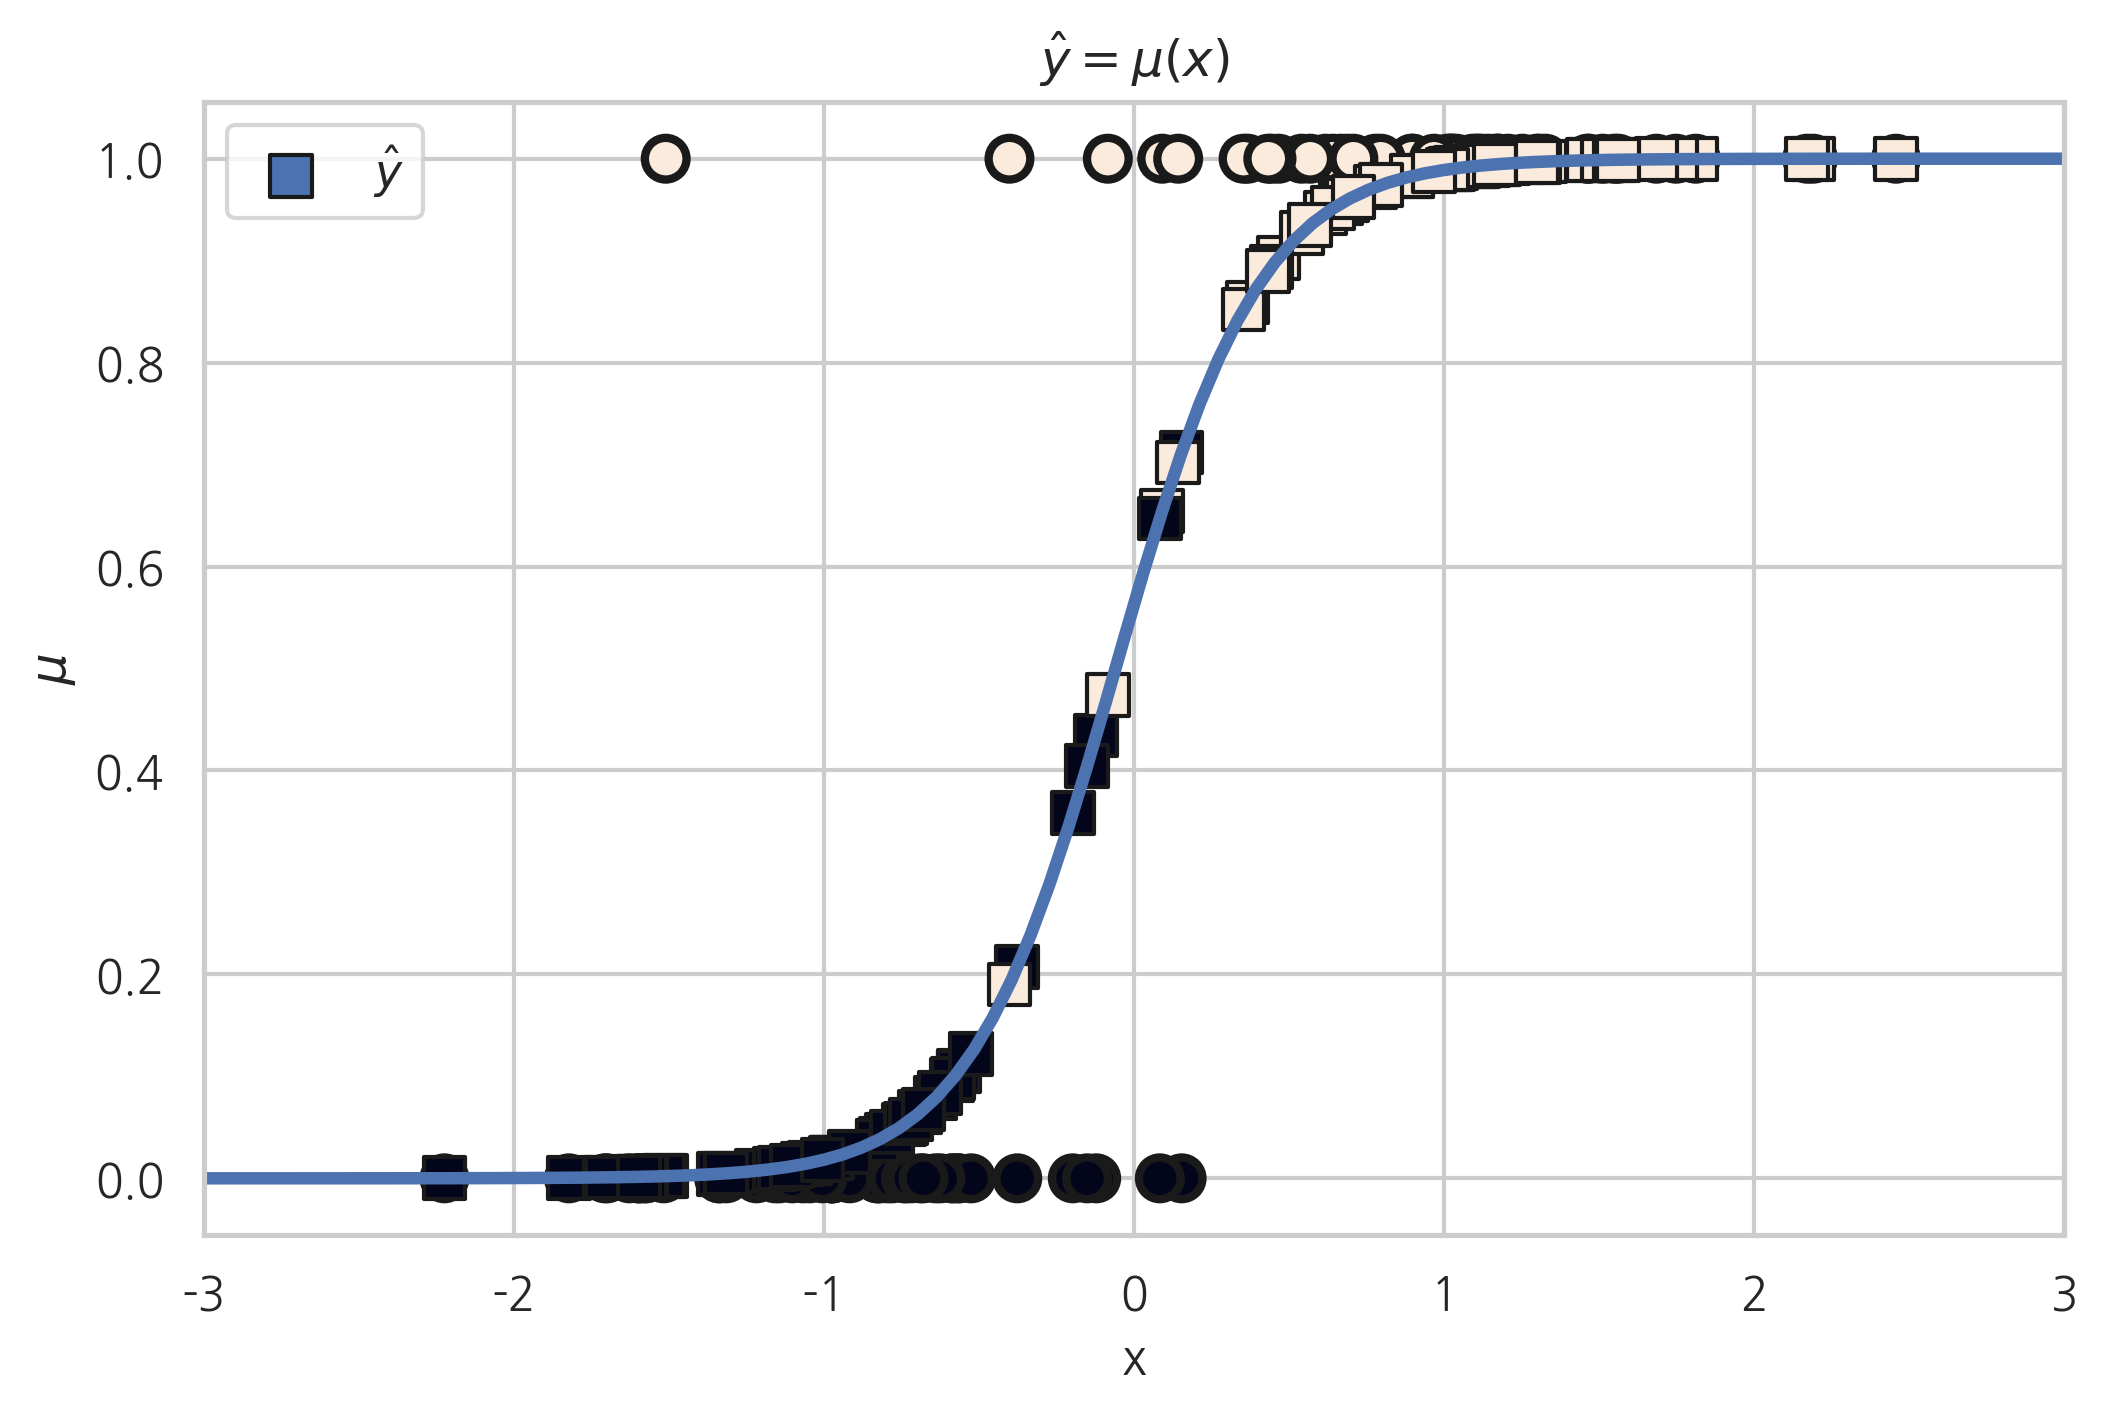

In [4]:
xx = np.linspace(-3, 3, 100)
mu = logit_res.predict(sm.add_constant(xx))
plt.plot(xx, mu, lw=3)
plt.scatter(X0, y, c=y, s=100, edgecolor="k", lw=2)
plt.scatter(X0, logit_res.predict(X), label=r"$\hat{y}$", marker='s', c=y,
            s=100, edgecolor="k", lw=1)
plt.xlim(-3, 3)
plt.xlabel("x")
plt.ylabel(r"$\mu$")
plt.title(r"$\hat{y} = \mu(x)$")
plt.legend()
plt.show()

### 판별함수

`Logit` 모형의 결과 객체에는 `fittedvalues`라는 속성으로 판별함수 $z=w^Tx$ 값이 들어가 있다. 이 값을 이용하여 분류문제를 풀 수도 있다.

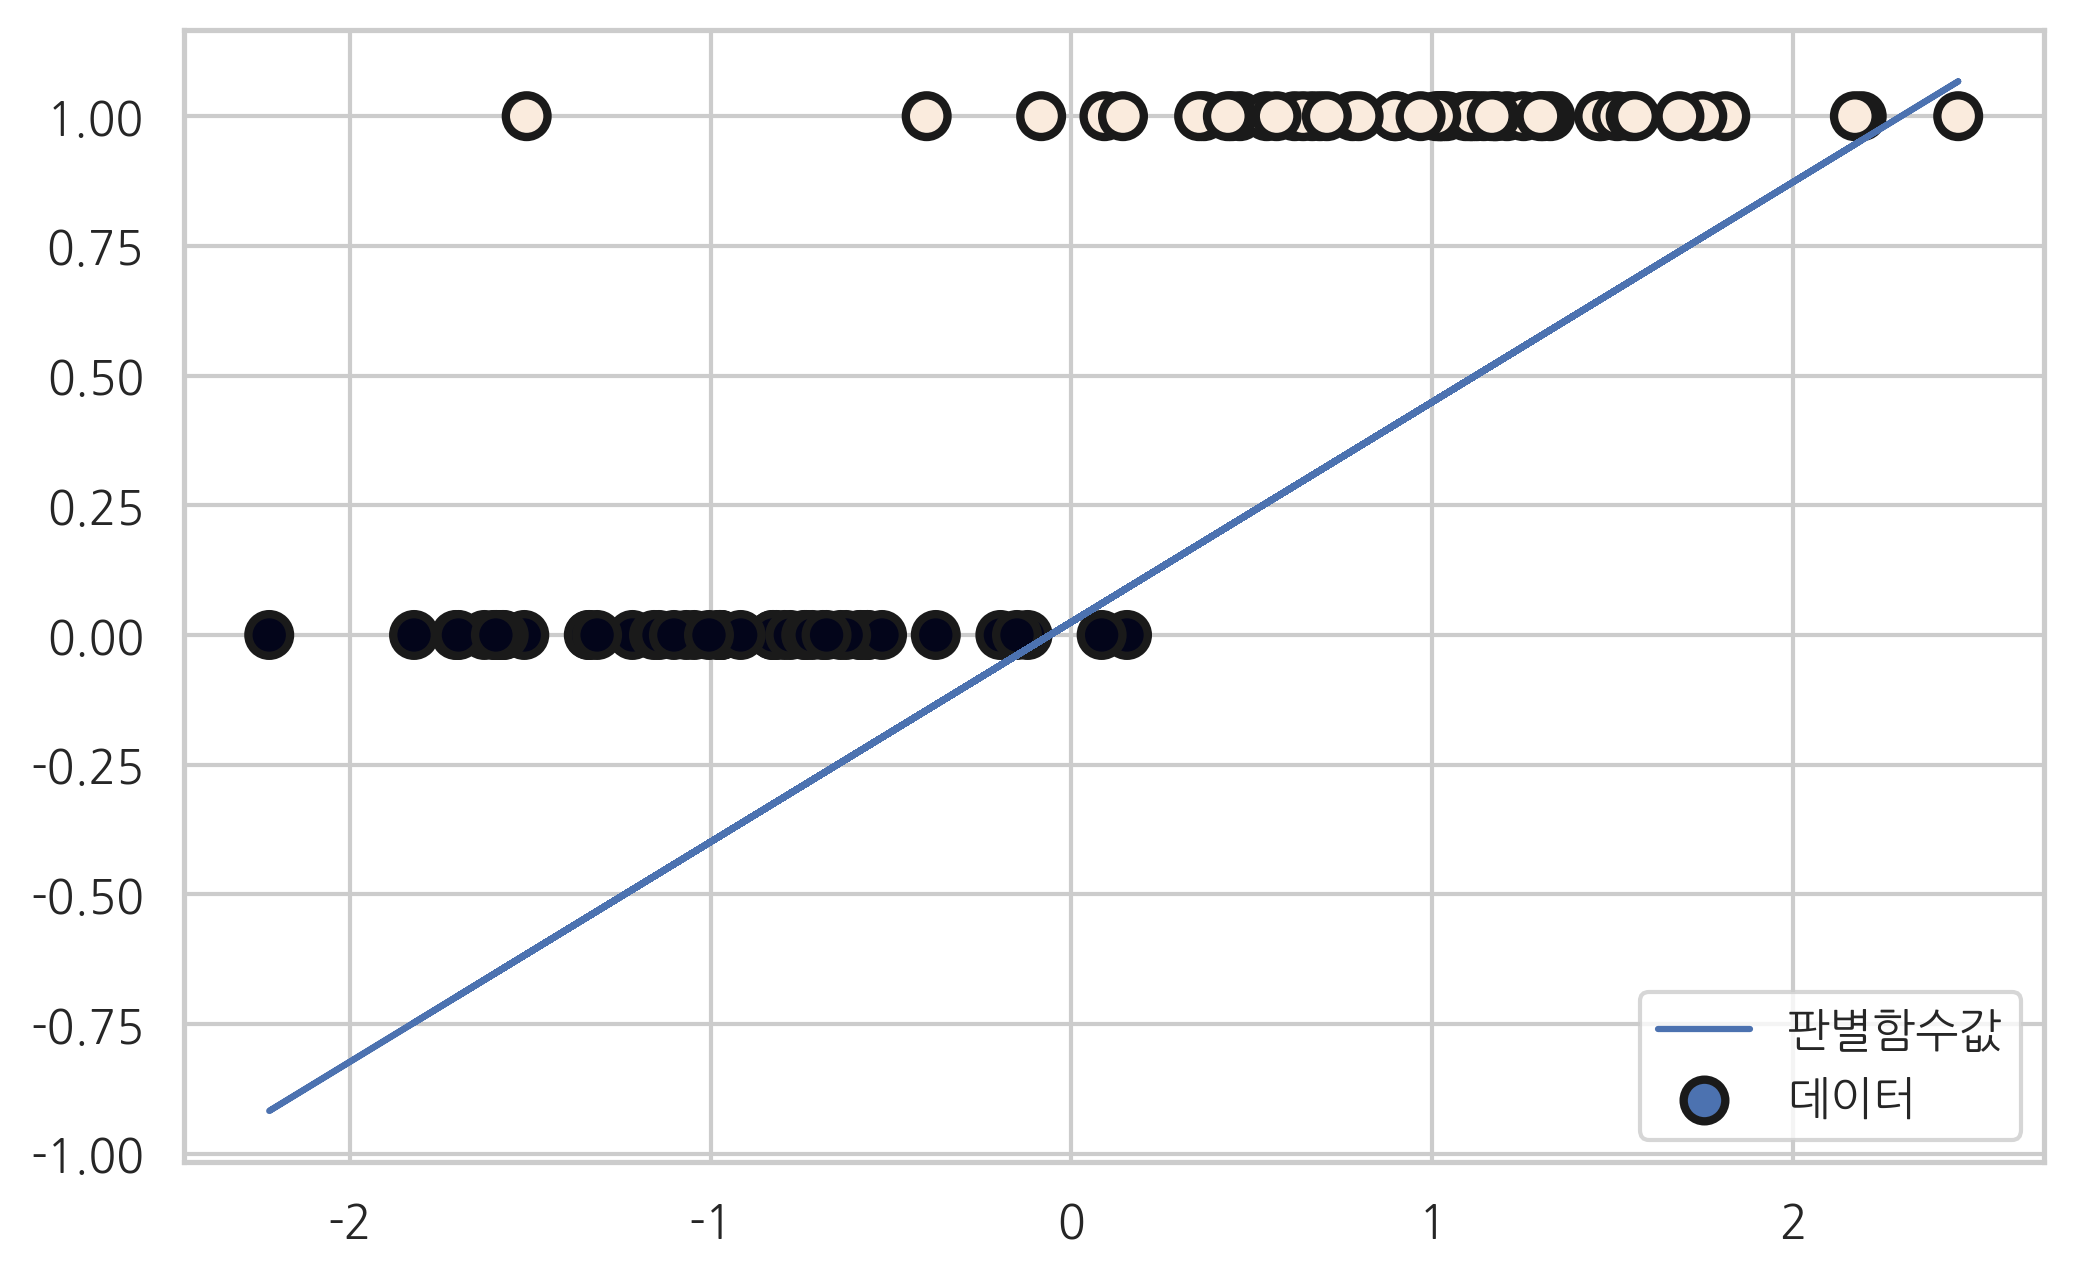

In [5]:
plt.scatter(X0, y, c=y, s=100, edgecolor="k", lw=2, label="데이터")
plt.plot(X0, logit_res.fittedvalues * 0.1, label="판별함수값")
plt.legend()
plt.show()

### 로지스틱 회귀 성능 측정

로지스틱 회귀 성능은 맥파든 의사결정계수(McFadden pseudo R square)값으로 측정한다.

$$ R^2_{\text{pseudo}} = 1 - \dfrac{G^2}{G^2_0} $$

$G^2$는 이탈도(deviance)라고 하는 양으로 다음과 같이 정의된다. 

$$ G^2 = 2\sum_{i=1}^N \left( y_i\log\dfrac{y_i}{\hat{y}_i} + (1-y_i)\log\dfrac{1-y_i}{1-\hat{y}_i} \right) $$

여기에서 $\hat{y}$는 $y=1$일 확률 $\mu$를 뜻한다.

$$ \hat{y}_i = \mu(x_i) $$


이탈도는 모형이 100% 정확한 경우에는 0이 되고 모형의 성능이 나빠질수록 값이 커진다. 

또한 이탈도는 로그 가능도에 음수를 취한 값과 같다.

$$
G^2 = -LL
$$

$G^2$는 현재 이탈도이고 $G^2_0$는 귀무모형(null model)으로 측정한 이탈도다.

귀무모형이란 모든 $x$가 $y$를 예측하는데 전혀 영향을 미치지 않는 모형을 말한다. 즉, 무조건부 확률 $p(y)$에 따라 $x$에 상관없이 동일하게 $y$를 예측하는 모형을 말한다. 결국 우리가 만들 수 있는 가장 성능이 나쁜 모형이 된다.

$$ \mu_{\text{null}} = \dfrac{\text{number of $Y=1$ data}}{\text{number of all data}} $$

따라서 맥파든 의사결정계수는 가장 성능이 좋을 때는 1이 되고 가장 성능이 나쁠 때는 0이 된다.

scikit-learn 패키지의 metric 서브패키지에는 로그 손실을 계산하는 `log_loss` 함수가 있다. `normalize=False`로 놓으면 이탈도와 같은 값을 구한다

위 예제에서 최적 모형의 로그 손실은 약 16.08로 계산된다.

In [6]:
from sklearn.metrics import log_loss

y_hat = logit_res.predict(X)
log_loss(y, y_hat, normalize=False)

16.084355200413036

귀무 모형의 모수값을 구하면 0.51이고 이 값으로 로그 손실을 계산하면 약 69이다.

In [7]:
mu_null = np.sum(y) / len(y)
mu_null

0.51

In [8]:
y_null = np.ones_like(y) * mu_null
log_loss(y, y_null, normalize=False)

69.29471672244784

두 값을 이용하여 맥파든 의사 결정계수 값을 계산할 수 있다.

In [9]:
1 - (log_loss(y, y_hat) / log_loss(y, y_null))

0.7678848264170398

### Scikit-Learn 패키지의 로지스틱 회귀

Scikit-Learn 패키지는 로지스틱 회귀 모형 `LogisticRegression` 를 제공한다. 

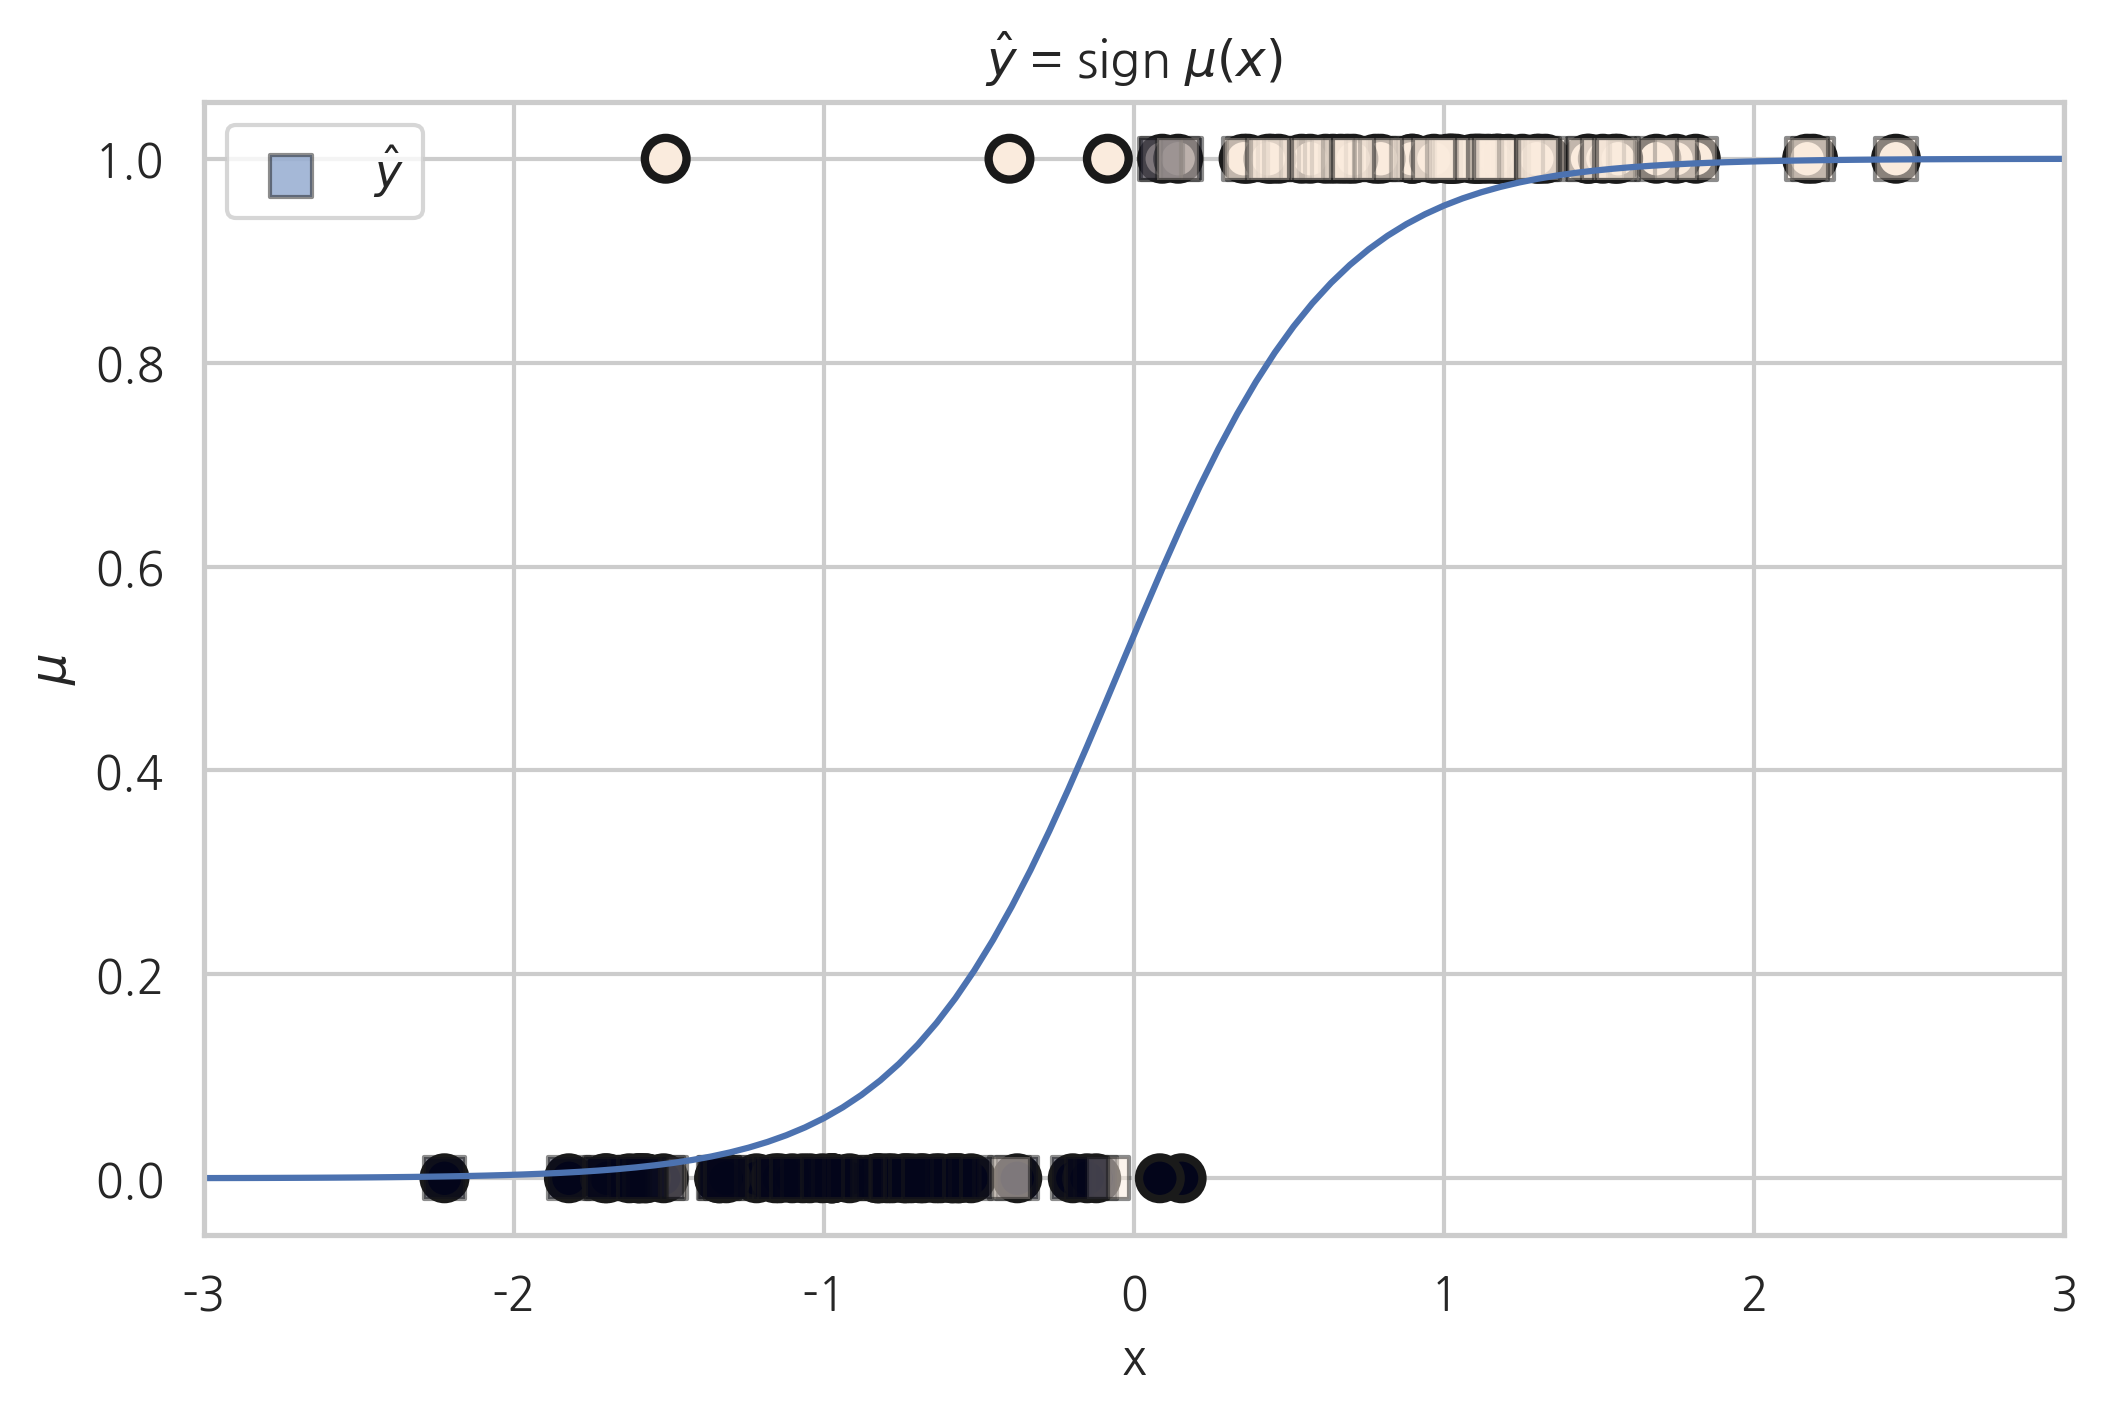

In [10]:
from sklearn.linear_model import LogisticRegression

model_sk = LogisticRegression().fit(X0, y)

xx = np.linspace(-3, 3, 100)
mu = 1.0/(1 + np.exp(-model_sk.coef_[0][0]*xx - model_sk.intercept_[0]))
plt.plot(xx, mu)
plt.scatter(X0, y, c=y, s=100, edgecolor="k", lw=2)
plt.scatter(X0, model_sk.predict(X0), label=r"$\hat{y}$", marker='s', c=y,
            s=100, edgecolor="k", lw=1, alpha=0.5)
plt.xlim(-3, 3)
plt.xlabel("x")
plt.ylabel(r"$\mu$")
plt.title(r"$\hat{y}$ = sign $\mu(x)$")
plt.legend()
plt.show()

#### 연습 문제 1

1. 붓꽃 분류문제에서 클래스가 세토사와 베르시칼라 데이터만 사용하고 (setosa=0, versicolor=1) 독립변수로는 꽃받침 길이(Sepal Length)와 상수항만 사용하여 StatsModels 패키지의 로지스틱 회귀모형으로 결과를 예측하고 보고서를 출력한다. 이 보고서에서 어떤 값이 세토사와 베르시칼라를 구분하는 기준값(threshold)으로 사용되고 있는가?
2. 위 결과를 분류결과표(confusion matrix)와 분류결과보고서(classification report)로 나타내라.
3. 이 모형에 대해 ROC커브를 그리고 AUC를 구한다. 이 때 Scikit-Learn의 `LogisticRegression`을 사용하지 않고 위에서 StatsModels로 구한 모형을 사용한다.

In [11]:
from sklearn.datasets import load_iris

iris = load_iris()
X = iris.data
y = iris.target
dfX = pd.DataFrame(X, columns=iris.feature_names)
dfy = pd.DataFrame(y, columns=["species"])
df = pd.concat([dfX, dfy], axis=1)
df = df[["sepal length (cm)", "species"]]
df = df[df.species.isin([0, 1])]
df = df.rename(columns={"sepal length (cm)": "sepal_length" })

import statsmodels.api as sm

model = sm.Logit.from_formula("species ~ sepal_length", data=df)
result = model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.321056
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:                species   No. Observations:                  100
Model:                          Logit   Df Residuals:                       98
Method:                           MLE   Df Model:                            1
Date:                Sat, 06 Jun 2020   Pseudo R-squ.:                  0.5368
Time:                        10:01:22   Log-Likelihood:                -32.106
converged:                       True   LL-Null:                       -69.315
Covariance Type:            nonrobust   LLR p-value:                 6.320e-18
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept      -27.8315      5.434     -5.122      0.000     -38.481     -17.182
sepal_length     5.1403

In [1]:
# 기준값
(0.5 + 27.8315) /  5.1403

5.511643289302181

In [12]:
y_pred = result.predict(df.sepal_length) >= 0.5

from sklearn.metrics import confusion_matrix

confusion_matrix(df.species, y_pred)

array([[45,  5],
       [ 6, 44]])

In [13]:
from sklearn.metrics import classification_report

print(classification_report(df.species, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.90      0.89        50
           1       0.90      0.88      0.89        50

    accuracy                           0.89       100
   macro avg       0.89      0.89      0.89       100
weighted avg       0.89      0.89      0.89       100



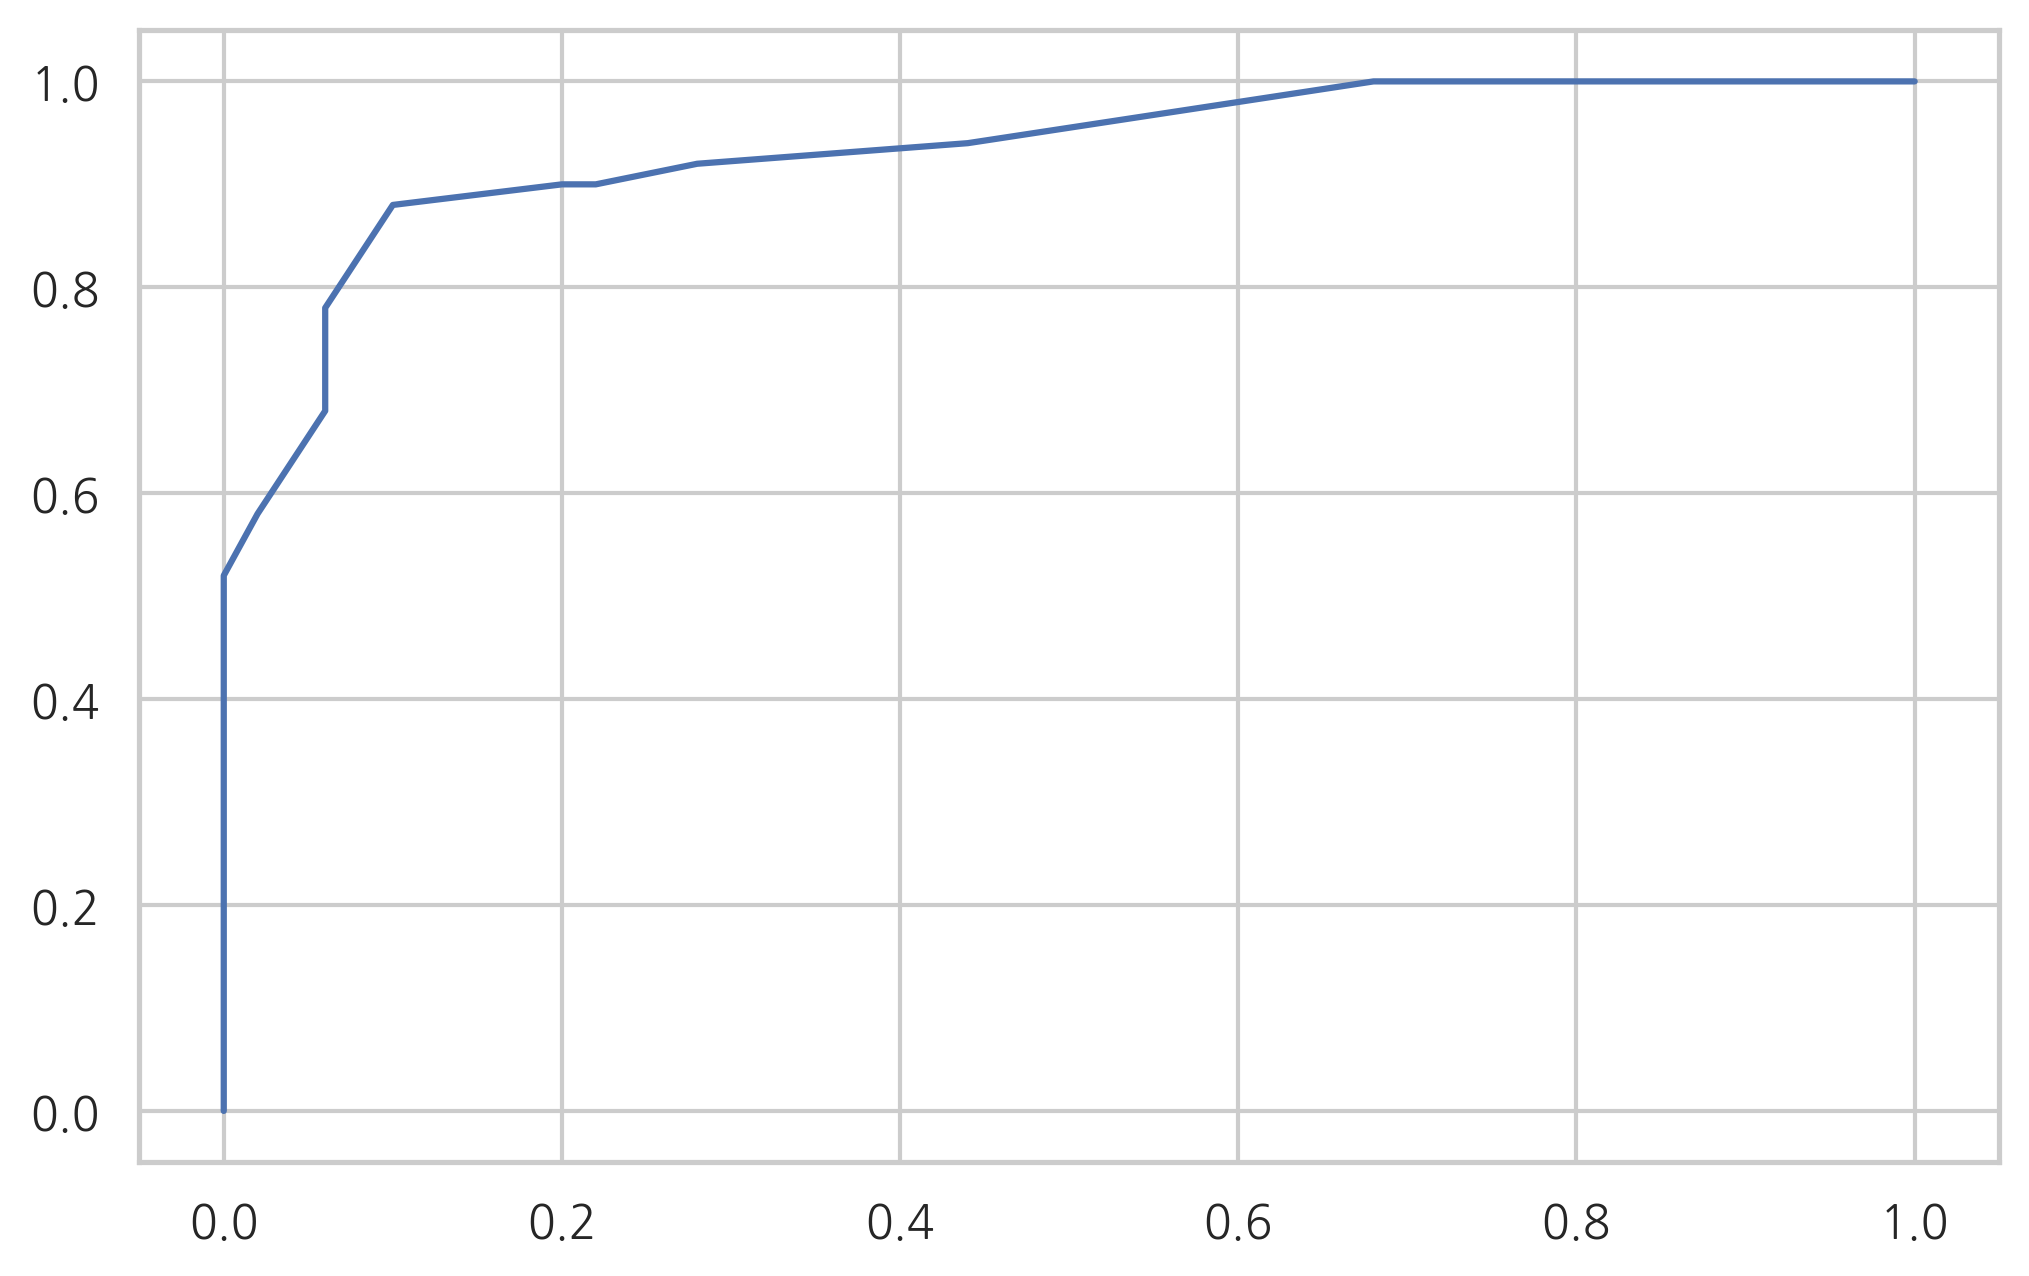

In [14]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(df.species, result.predict(df.sepal_length))
plt.plot(fpr, tpr)
plt.show()

In [15]:
from sklearn.metrics import auc
auc(fpr, tpr)

0.9326

### 로지스틱 회귀를 사용한 이진 분류의 예

다음 데이터는 미국 의대생의 입학관련 데이터이다. 데이터의 의미는 다음과 같다.

* `Acceptance`: 0이면 불합격, 1이면 합격
* `BCPM`: Bio/Chem/Physics/Math 과목의 학점 평균
* `GPA`: 전체과목 학점 평균
* `VR`: MCAT Verbal reasoning 과목 점수
* `PS`: MCAT Physical sciences 과목 점수
* `WS`: MCAT Writing sample 과목 점수
* `BS`: MCAT Biological sciences 과목 점수
* `MCAT`: MCAT 촘점
* `Apps`: 의대 지원 횟수

In [16]:
data_med = sm.datasets.get_rdataset("MedGPA", package="Stat2Data")
df_med = data_med.data
df_med.tail()

,Accept,Acceptance,Sex,BCPM,GPA,VR,PS,WS,BS,MCAT,Apps
50,D,0,M,2.41,2.72,8,8,8.0,8,32,7
51,D,0,M,3.51,3.56,11,8,6.0,9,34,6
52,A,1,F,3.43,3.48,7,10,7.0,10,34,14
53,D,0,M,2.61,2.80,7,5,NaN,6,18,6
54,D,0,M,3.36,3.44,11,11,8.0,9,39,1


일단 학점(GPA)과 합격여부의 관계를 살펴보자.

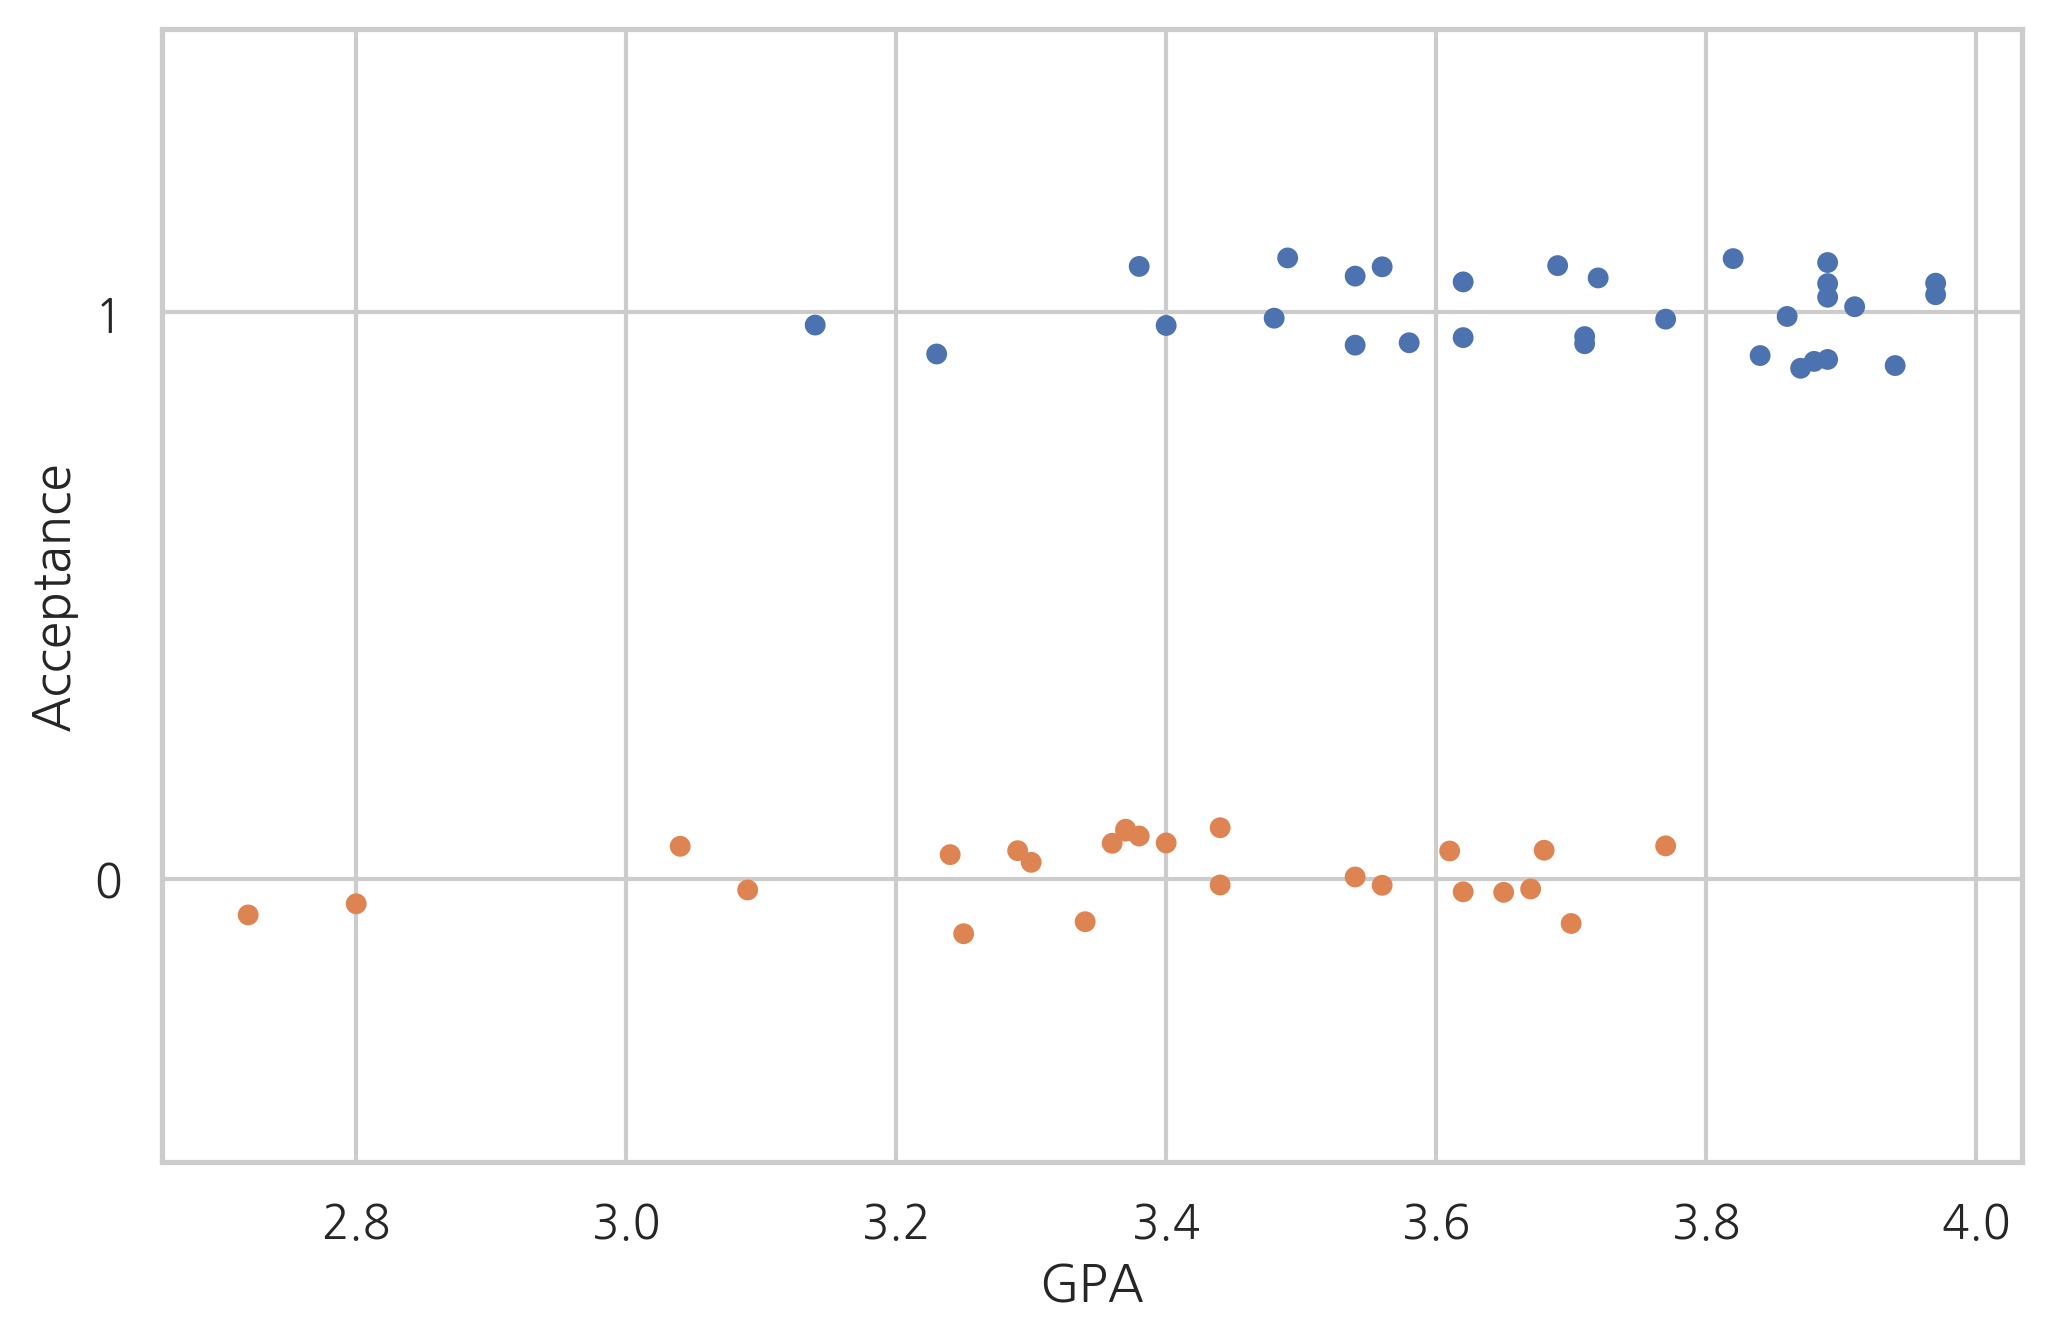

In [17]:
sns.stripplot(x="GPA", y="Acceptance", data=df_med,
              jitter=True, orient='h', order=[1, 0])
plt.grid(True)
plt.show()

로지스틱 회귀분석을 실시한다. `MCAT = VR + PS + WS + BS`이므로 이 `MCAT`은 독립 변수에서 제외해야 한다.

In [18]:
model_med = sm.Logit.from_formula("Acceptance ~ Sex + BCPM + GPA + VR + PS + WS + BS + Apps", df_med)
result_med = model_med.fit()
print(result_med.summary())

Optimization terminated successfully.
         Current function value: 0.280736
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:             Acceptance   No. Observations:                   54
Model:                          Logit   Df Residuals:                       45
Method:                           MLE   Df Model:                            8
Date:                Sat, 06 Jun 2020   Pseudo R-squ.:                  0.5913
Time:                        10:01:33   Log-Likelihood:                -15.160
converged:                       True   LL-Null:                       -37.096
Covariance Type:            nonrobust   LLR p-value:                 6.014e-07
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -46.6414     15.600     -2.990      0.003     -77.216     -16.067
Sex[T.M]      -2.2835      1.

예측 결과와 실제 결과를 비교하면 다음과 같다.

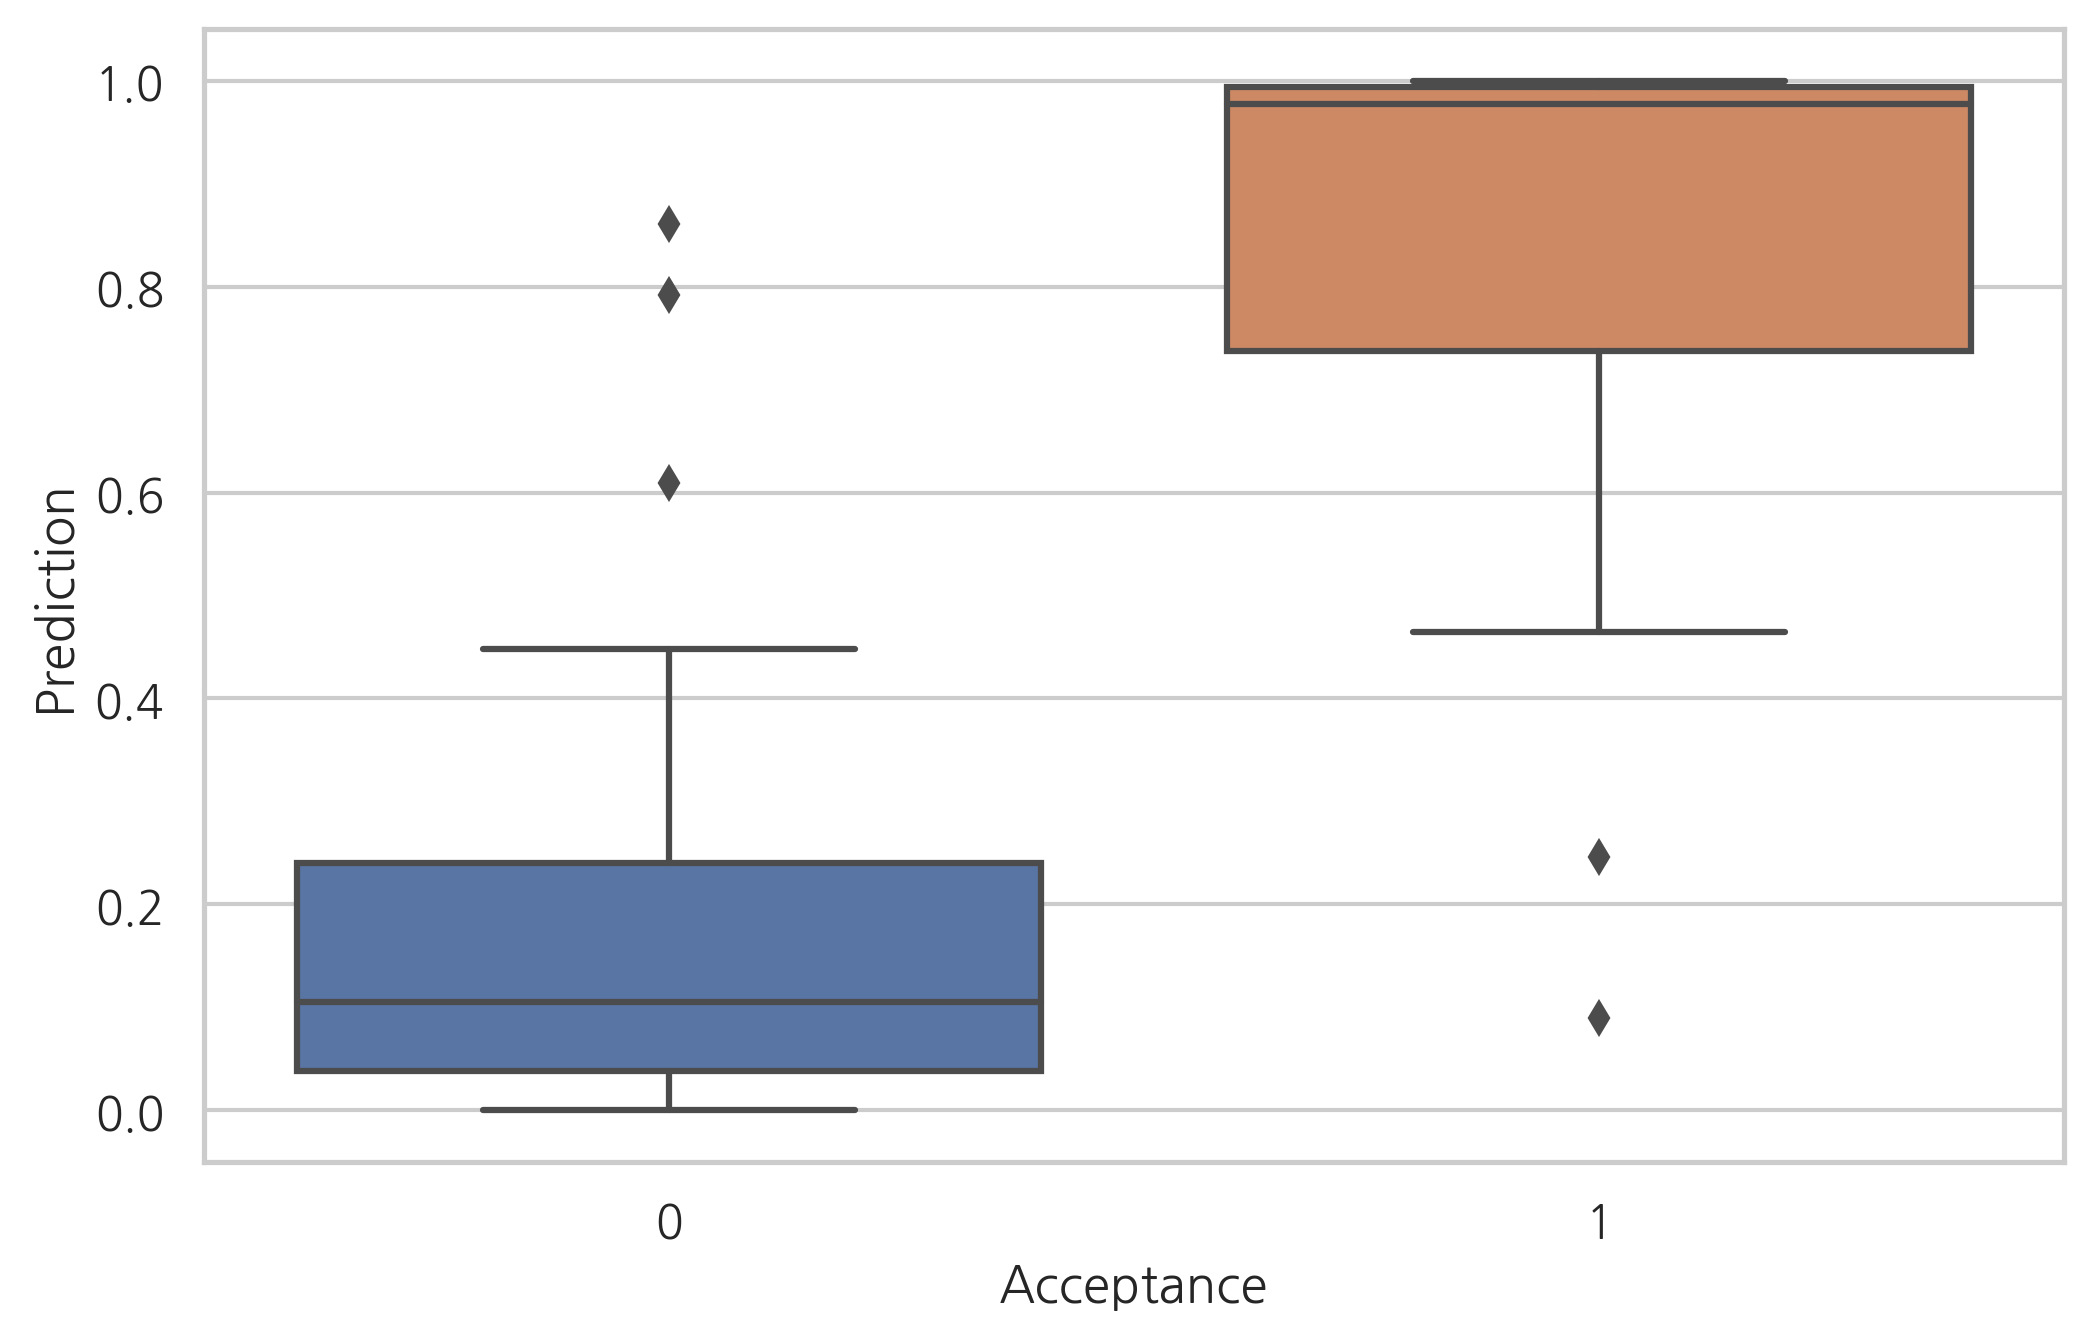

In [19]:
df_med["Prediction"] = result_med.predict(df_med)
sns.boxplot(x="Acceptance", y="Prediction", data=df_med)
plt.show()

위 분석 결과를 토대로 유의하지 않은 변수들을 제외하고 PS와 BS 점수만을 이용하여 다시 회귀분석하면 다음과 같다.

In [20]:
model_med = sm.Logit.from_formula("Acceptance ~ PS + BS", df_med)
result_med = model_med.fit()
print(result_med.summary())

Optimization terminated successfully.
         Current function value: 0.460609
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:             Acceptance   No. Observations:                   55
Model:                          Logit   Df Residuals:                       52
Method:                           MLE   Df Model:                            2
Date:                Sat, 06 Jun 2020   Pseudo R-squ.:                  0.3315
Time:                        10:01:36   Log-Likelihood:                -25.333
converged:                       True   LL-Null:                       -37.896
Covariance Type:            nonrobust   LLR p-value:                 3.503e-06
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -15.5427      4.684     -3.318      0.001     -24.723      -6.362
PS             0.4798      0.

위 결과를 바탕으로 다음 점수가 $15.5427+0.5$보다 크면 합격이라고 예측할 수 있다.

$$
0.4798 \text{PS} + 1.1464 \text{BS}
$$

#### 연습 문제 2

1. 붓꽃 분류문제에서 클래스가 베르시칼라(versicolor)와 버지니카(virginica) 데이터만 사용하여(versicolor=1, virginica=2) 로지스틱 회귀모형으로 결과를 예측하고 보고서를 출력한다. 독립변수는 모두 사용한다. 이 보고서에서 버지니카와 베르시칼라를 구분하는 경계면의 방정식을 찾아라.
2. 위 결과를 분류결과표와 분류결과보고서로 나타내라.
3. 이 모형에 대해 ROC커브를 그리고 AUC를 구하라.  이 때 Scikit-Learn의 `LogisticRegression`을 사용하지 않고 위에서 StatsModels로 구한 모형을 사용한다.

In [21]:
from sklearn.datasets import load_iris

iris = load_iris()
X = iris.data
y = iris.target
dfX = pd.DataFrame(X, columns=iris.feature_names)
dfy = pd.DataFrame(y, columns=["species"])
df = pd.concat([dfX, dfy], axis=1)
df = df[df.species.isin([1, 2])]
df["species"] -= 1
df = df.rename(
    columns={
        "sepal length (cm)": "sepal_length",
        "sepal width (cm)": "sepal_width",
        "petal length (cm)": "petal_length",
        "petal width (cm)": "petal_width",
    }
)

import statsmodels.api as sm

model = sm.Logit.from_formula(
    "species ~ sepal_length + sepal_width + petal_length + petal_width", 
    data=df)
result = model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.059493
         Iterations 12
                           Logit Regression Results                           
Dep. Variable:                species   No. Observations:                  100
Model:                          Logit   Df Residuals:                       95
Method:                           MLE   Df Model:                            4
Date:                Sat, 06 Jun 2020   Pseudo R-squ.:                  0.9142
Time:                        10:01:37   Log-Likelihood:                -5.9493
converged:                       True   LL-Null:                       -69.315
Covariance Type:            nonrobust   LLR p-value:                 1.947e-26
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept      -42.6378     25.708     -1.659      0.097     -93.024       7.748
sepal_length    -2.465

In [22]:
y_pred = result.predict(df) >= 0.5

from sklearn.metrics import confusion_matrix

confusion_matrix(df.species, y_pred)

array([[49,  1],
       [ 1, 49]])

In [23]:
from sklearn.metrics import classification_report

print(classification_report(df.species, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98        50
           1       0.98      0.98      0.98        50

    accuracy                           0.98       100
   macro avg       0.98      0.98      0.98       100
weighted avg       0.98      0.98      0.98       100



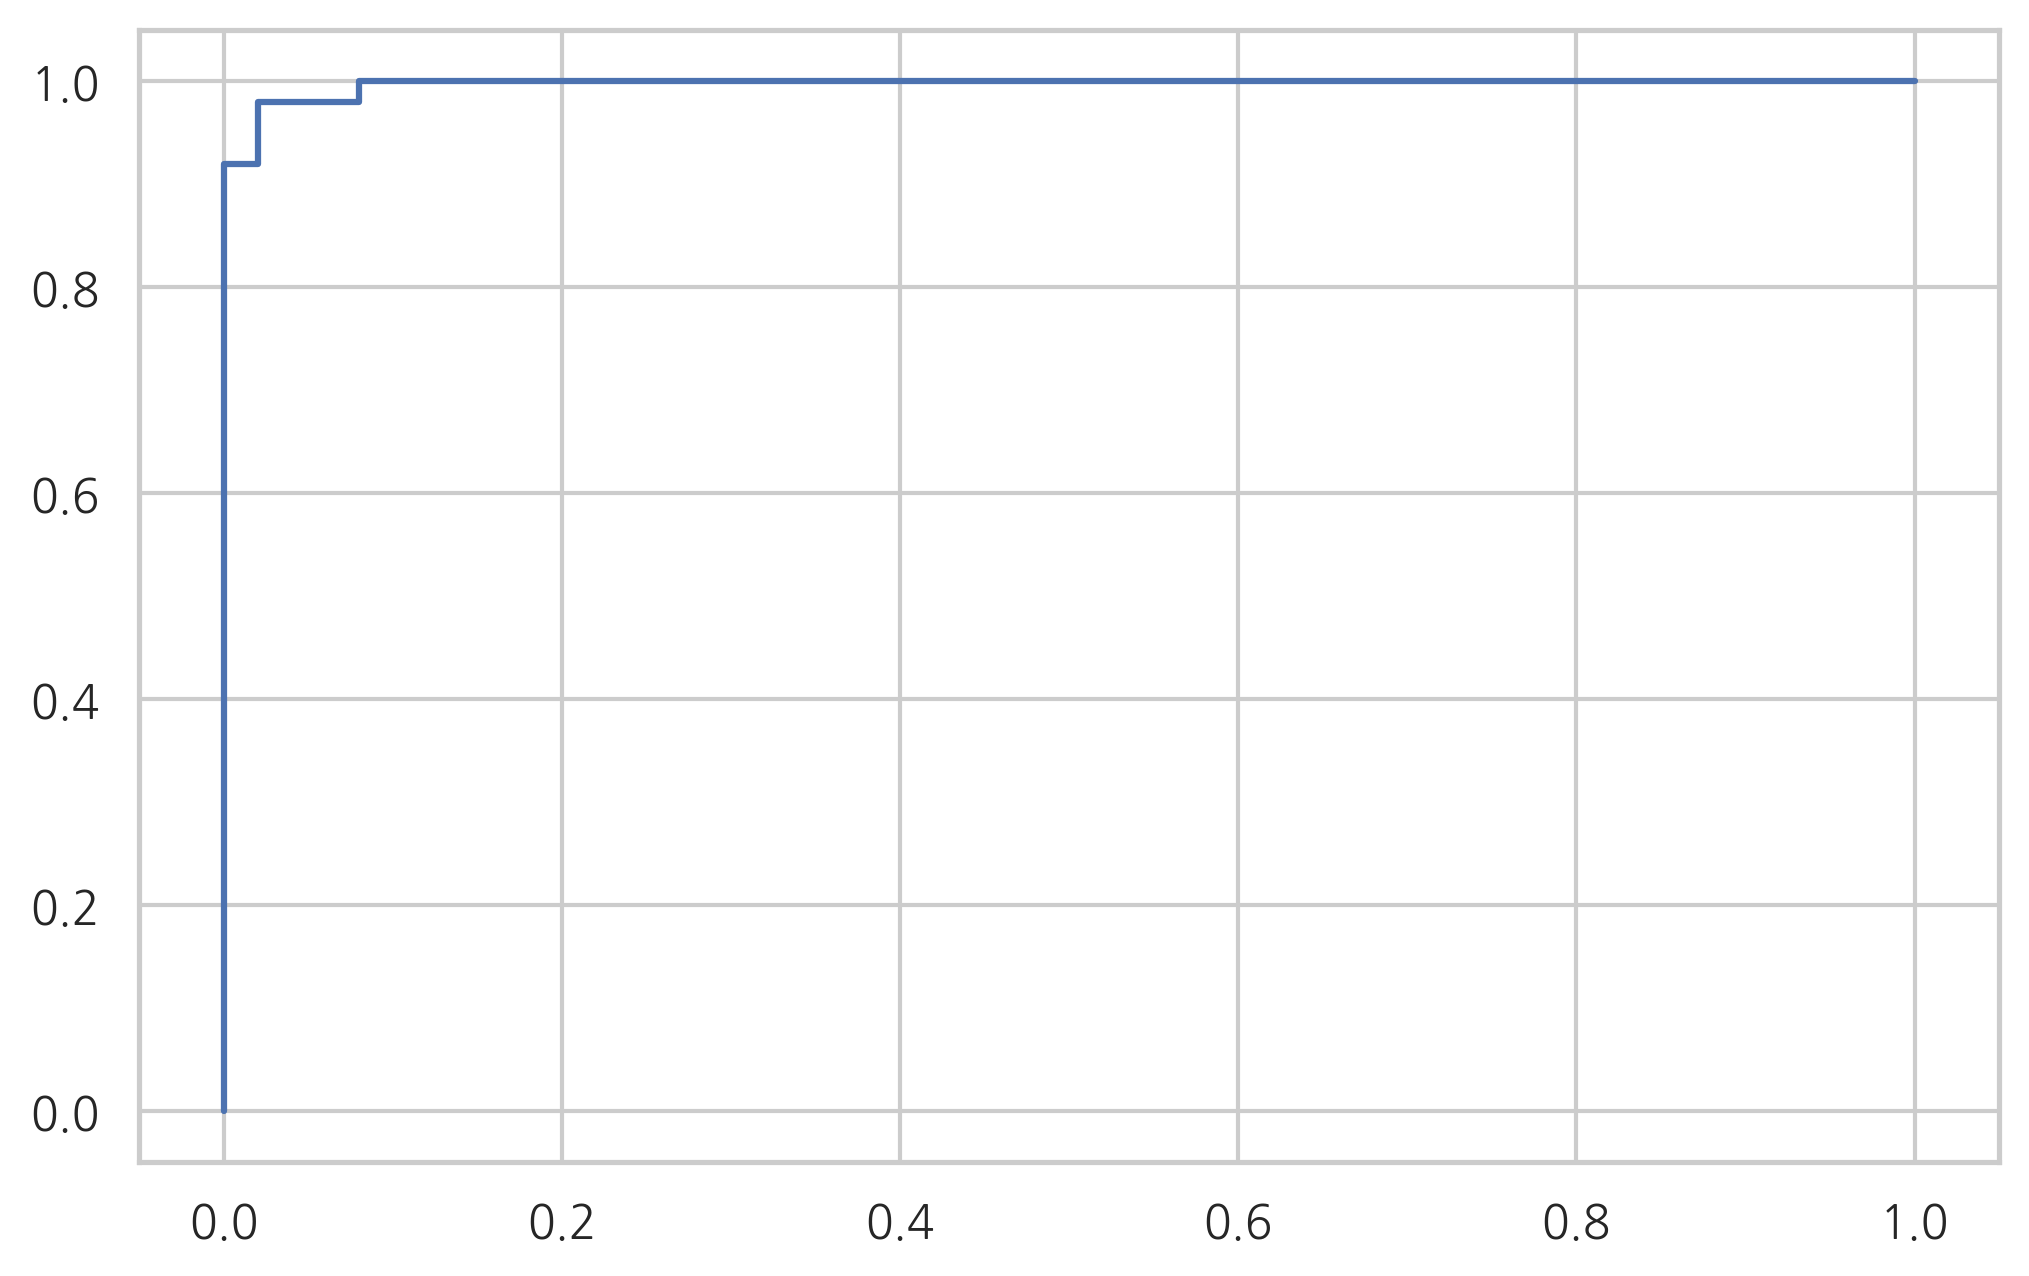

In [24]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(df.species, result.predict(df))
plt.plot(fpr, tpr)
plt.show()

In [25]:
from sklearn.metrics import auc
auc(fpr, tpr)

0.9972000000000001

### 로지스틱 회귀를 사용한 회귀분석

로지스틱 회귀는 분류문제뿐만 아니라 종속변수 $y$가 0부터 1까지 막혀있는 회귀분석 문제에도 사용할 수 있다. 이때는 다음처럼 $\mu$ 값을 종속변수 y의 예측값으로 사용한다.

$$ \hat{y} = \mu(x) $$

만약 실제 y의 범위가 0부터 1이 아니면 스케일링을 통해 바꿔야 한다.

#### 예제

다음 데이터는 1974년도에 "여성은 가정을 보살피고 국가를 운영하는 일은 남자에게 맡겨두어야 한다."라는 주장에 대한 찬성, 반대 입장을 조사한 결과이다. 각 열은 다음을 뜻한다. 

* `education`: 교육 기간
* `sex`: 성별
* `agree`: 찬성 인원
* `disagree`: 반대 인원
* `ratio`: 찬성 비율

In [26]:
data_wrole = sm.datasets.get_rdataset("womensrole", package="HSAUR")
df_wrole = data_wrole.data
df_wrole["ratio"] = df_wrole.agree / (df_wrole.agree + df_wrole.disagree)
df_wrole.tail()

,education,sex,agree,disagree,ratio
37,16,Female,13,115,0.101562
38,17,Female,3,28,0.096774
39,18,Female,0,21,0.000000
40,19,Female,1,2,0.333333
41,20,Female,2,4,0.333333


교육을 많이 받은 사람일수록 찬성 비율이 감소하는 것을 볼 수 있다.

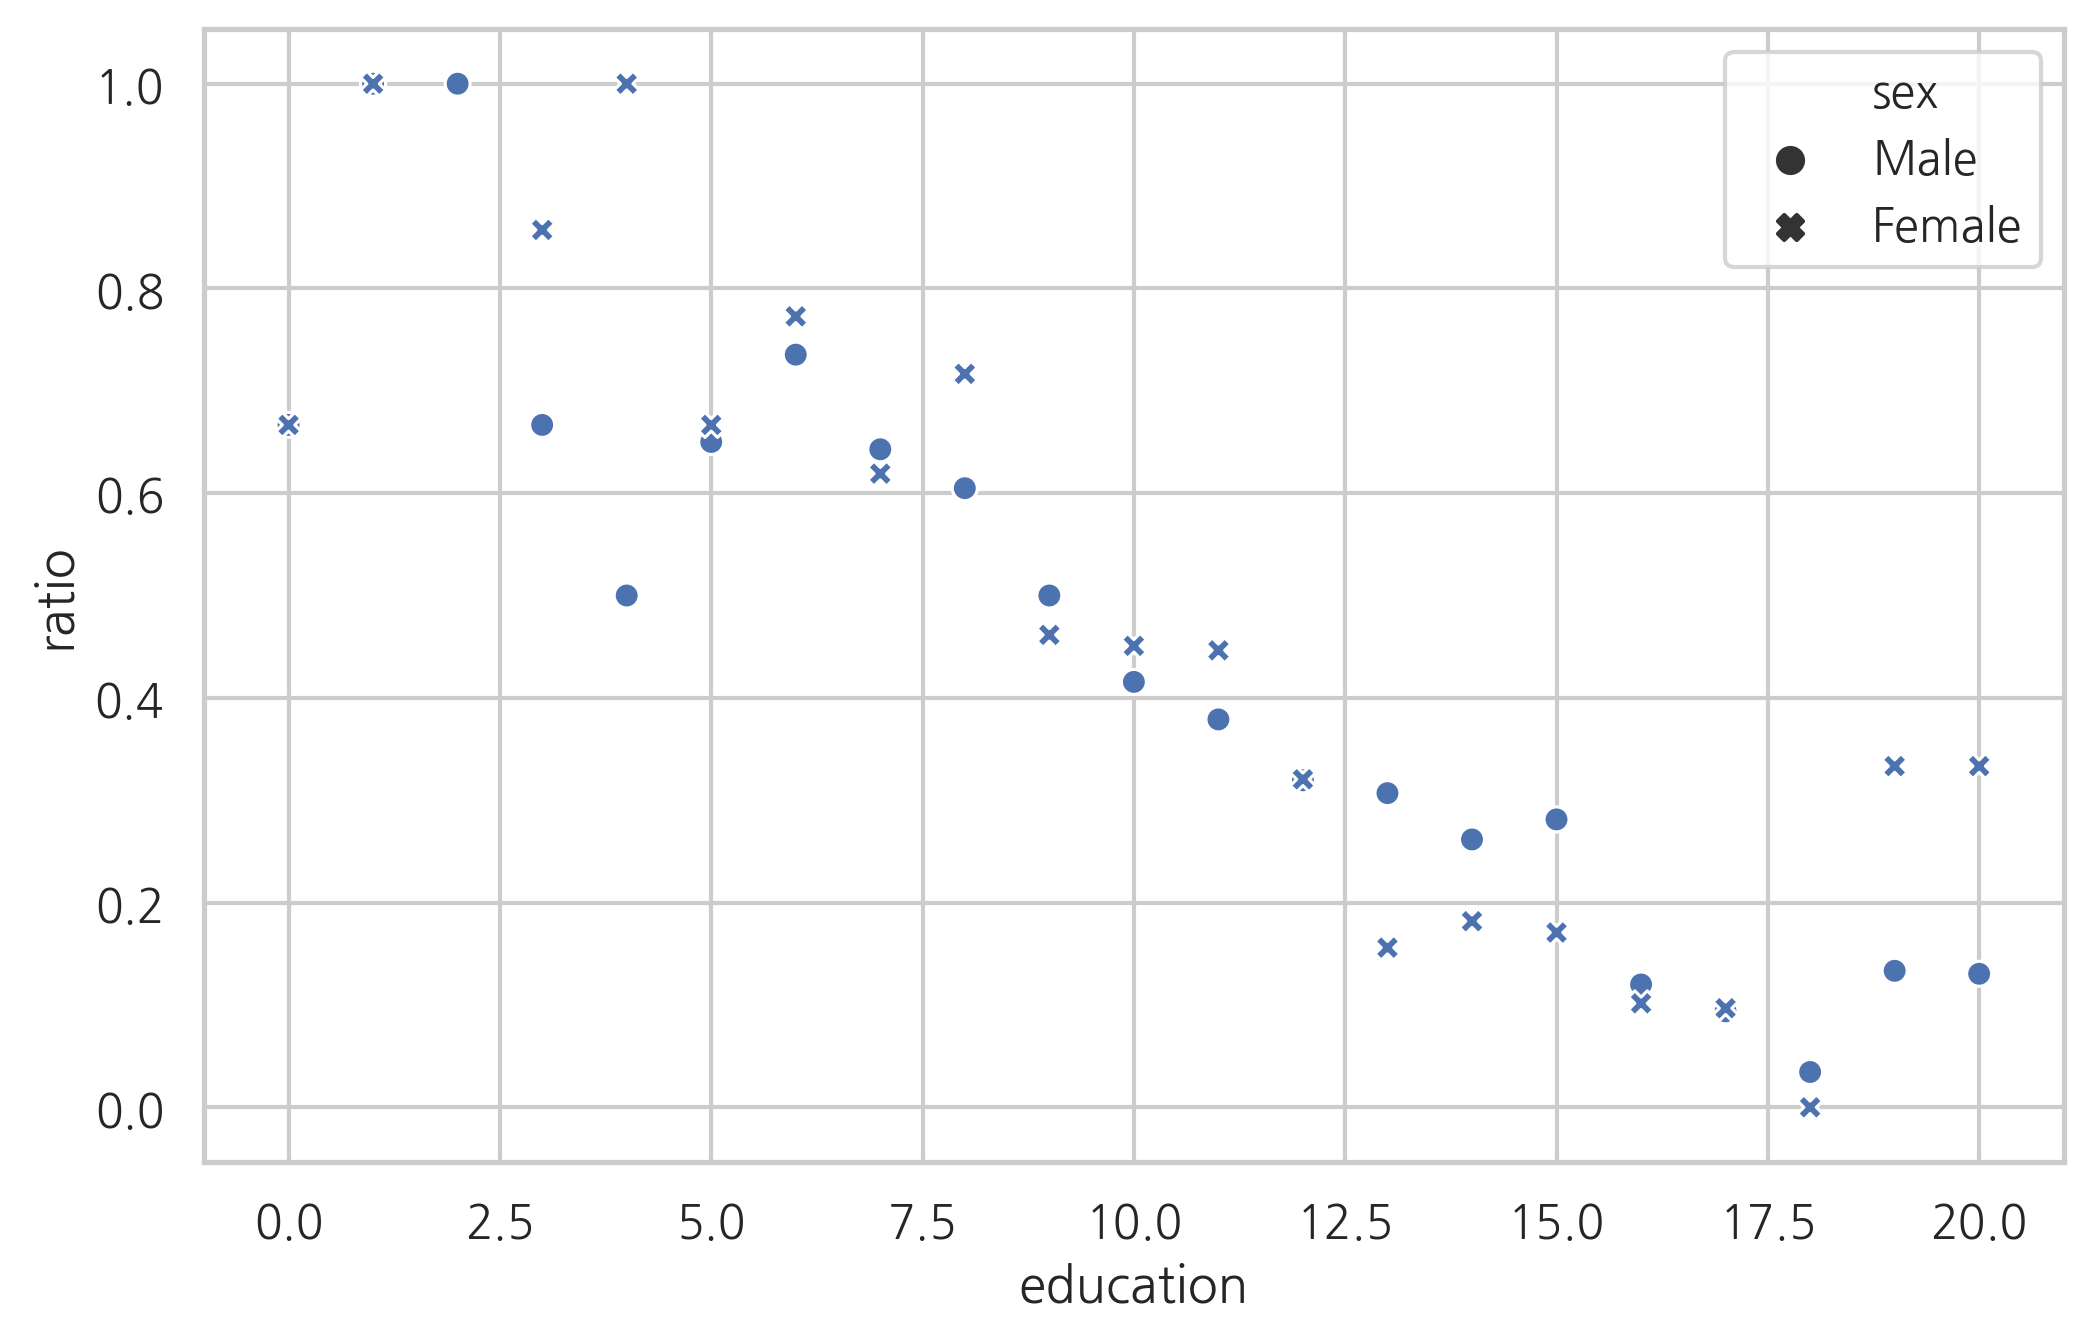

In [27]:
sns.scatterplot(x="education", y="ratio", style="sex", data=df_wrole)
plt.grid(True)
plt.show()

분석 결과는 다음과 같다.

In [28]:
model_wrole = sm.Logit.from_formula("ratio ~ education + sex", df_wrole)
result_wrole = model_wrole.fit()
print(result_wrole.summary())

Optimization terminated successfully.
         Current function value: 0.448292
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                  ratio   No. Observations:                   41
Model:                          Logit   Df Residuals:                       38
Method:                           MLE   Df Model:                            2
Date:                Sat, 06 Jun 2020   Pseudo R-squ.:                  0.3435
Time:                        10:01:57   Log-Likelihood:                -18.380
converged:                       True   LL-Null:                       -27.997
Covariance Type:            nonrobust   LLR p-value:                 6.660e-05
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       2.0442      0.889      2.299      0.022       0.302       3.787
sex[T.Male]    -0.1968    

성별은 유의하지 않다는 것을 알게되었으므로 성별을 제외하고 다시 모형을 구한다.

In [29]:
model_wrole2 = sm.Logit.from_formula("ratio ~ education", df_wrole)
result_wrole2 = model_wrole2.fit()
print(result_wrole2.summary())

Optimization terminated successfully.
         Current function value: 0.449186
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                  ratio   No. Observations:                   41
Model:                          Logit   Df Residuals:                       39
Method:                           MLE   Df Model:                            1
Date:                Sat, 06 Jun 2020   Pseudo R-squ.:                  0.3422
Time:                        10:01:58   Log-Likelihood:                -18.417
converged:                       True   LL-Null:                       -27.997
Covariance Type:            nonrobust   LLR p-value:                 1.202e-05
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.9345      0.781      2.478      0.013       0.405       3.464
education     -0.2117      0.

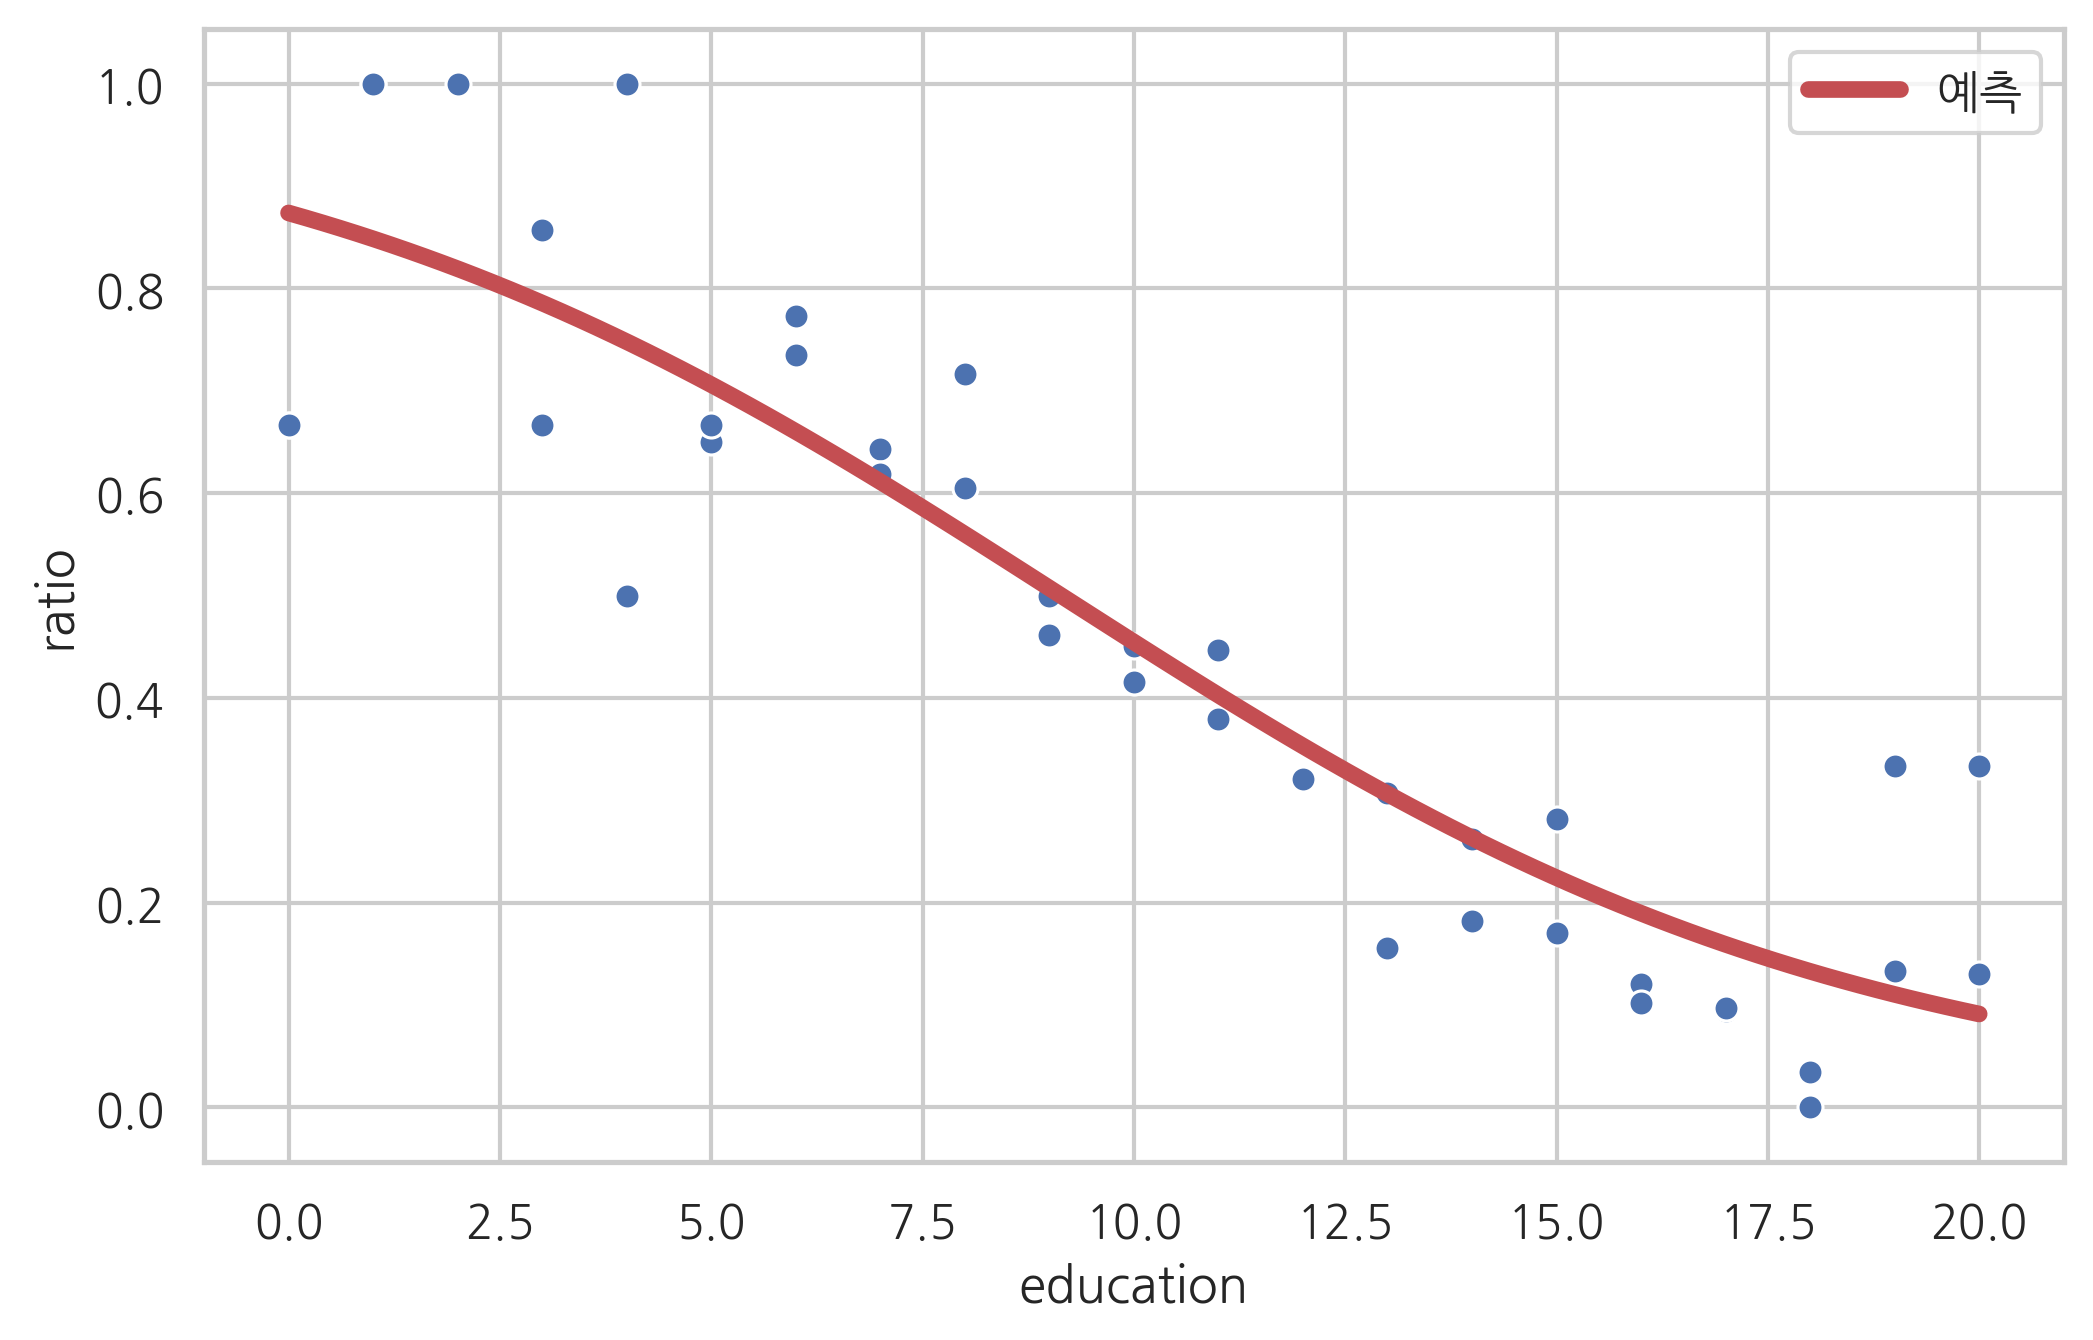

In [30]:
sns.scatterplot(x="education", y="ratio", data=df_wrole)
xx = np.linspace(0, 20, 100)
df_wrole_p = pd.DataFrame({"education": xx})
plt.plot(xx, result_wrole2.predict(df_wrole_p), "r-", lw=4, label="예측")
plt.legend()
plt.show()

In [31]:
# 연습문제 1 답

In [32]:
from sklearn.datasets import load_iris

iris = load_iris()
idx = np.in1d(iris.target, [0, 1])
X0 = iris.data[idx, :1]
X = sm.add_constant(X0)
y = iris.target[idx]

In [33]:
logit_mod = sm.Logit(y, X)
logit_res = logit_mod.fit(disp=0)
print(logit_res.summary())

                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                  100
Model:                          Logit   Df Residuals:                       98
Method:                           MLE   Df Model:                            1
Date:                Sat, 06 Jun 2020   Pseudo R-squ.:                  0.5368
Time:                        10:02:05   Log-Likelihood:                -32.106
converged:                       True   LL-Null:                       -69.315
Covariance Type:            nonrobust   LLR p-value:                 6.320e-18
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -27.8315      5.434     -5.122      0.000     -38.481     -17.182
x1             5.1403      1.007      5.107      0.000       3.168       7.113


In [34]:
logit_res.params

array([-27.83145099,   5.14033614])

In [35]:
-logit_res.params[0] / logit_res.params[1]

5.41432510257189

In [36]:
y_pred = logit_res.predict(X) >= 0.5

In [37]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y, y_pred)

array([[45,  5],
       [ 6, 44]])

In [38]:
from sklearn.metrics import classification_report

print(classification_report(y, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.90      0.89        50
           1       0.90      0.88      0.89        50

    accuracy                           0.89       100
   macro avg       0.89      0.89      0.89       100
weighted avg       0.89      0.89      0.89       100



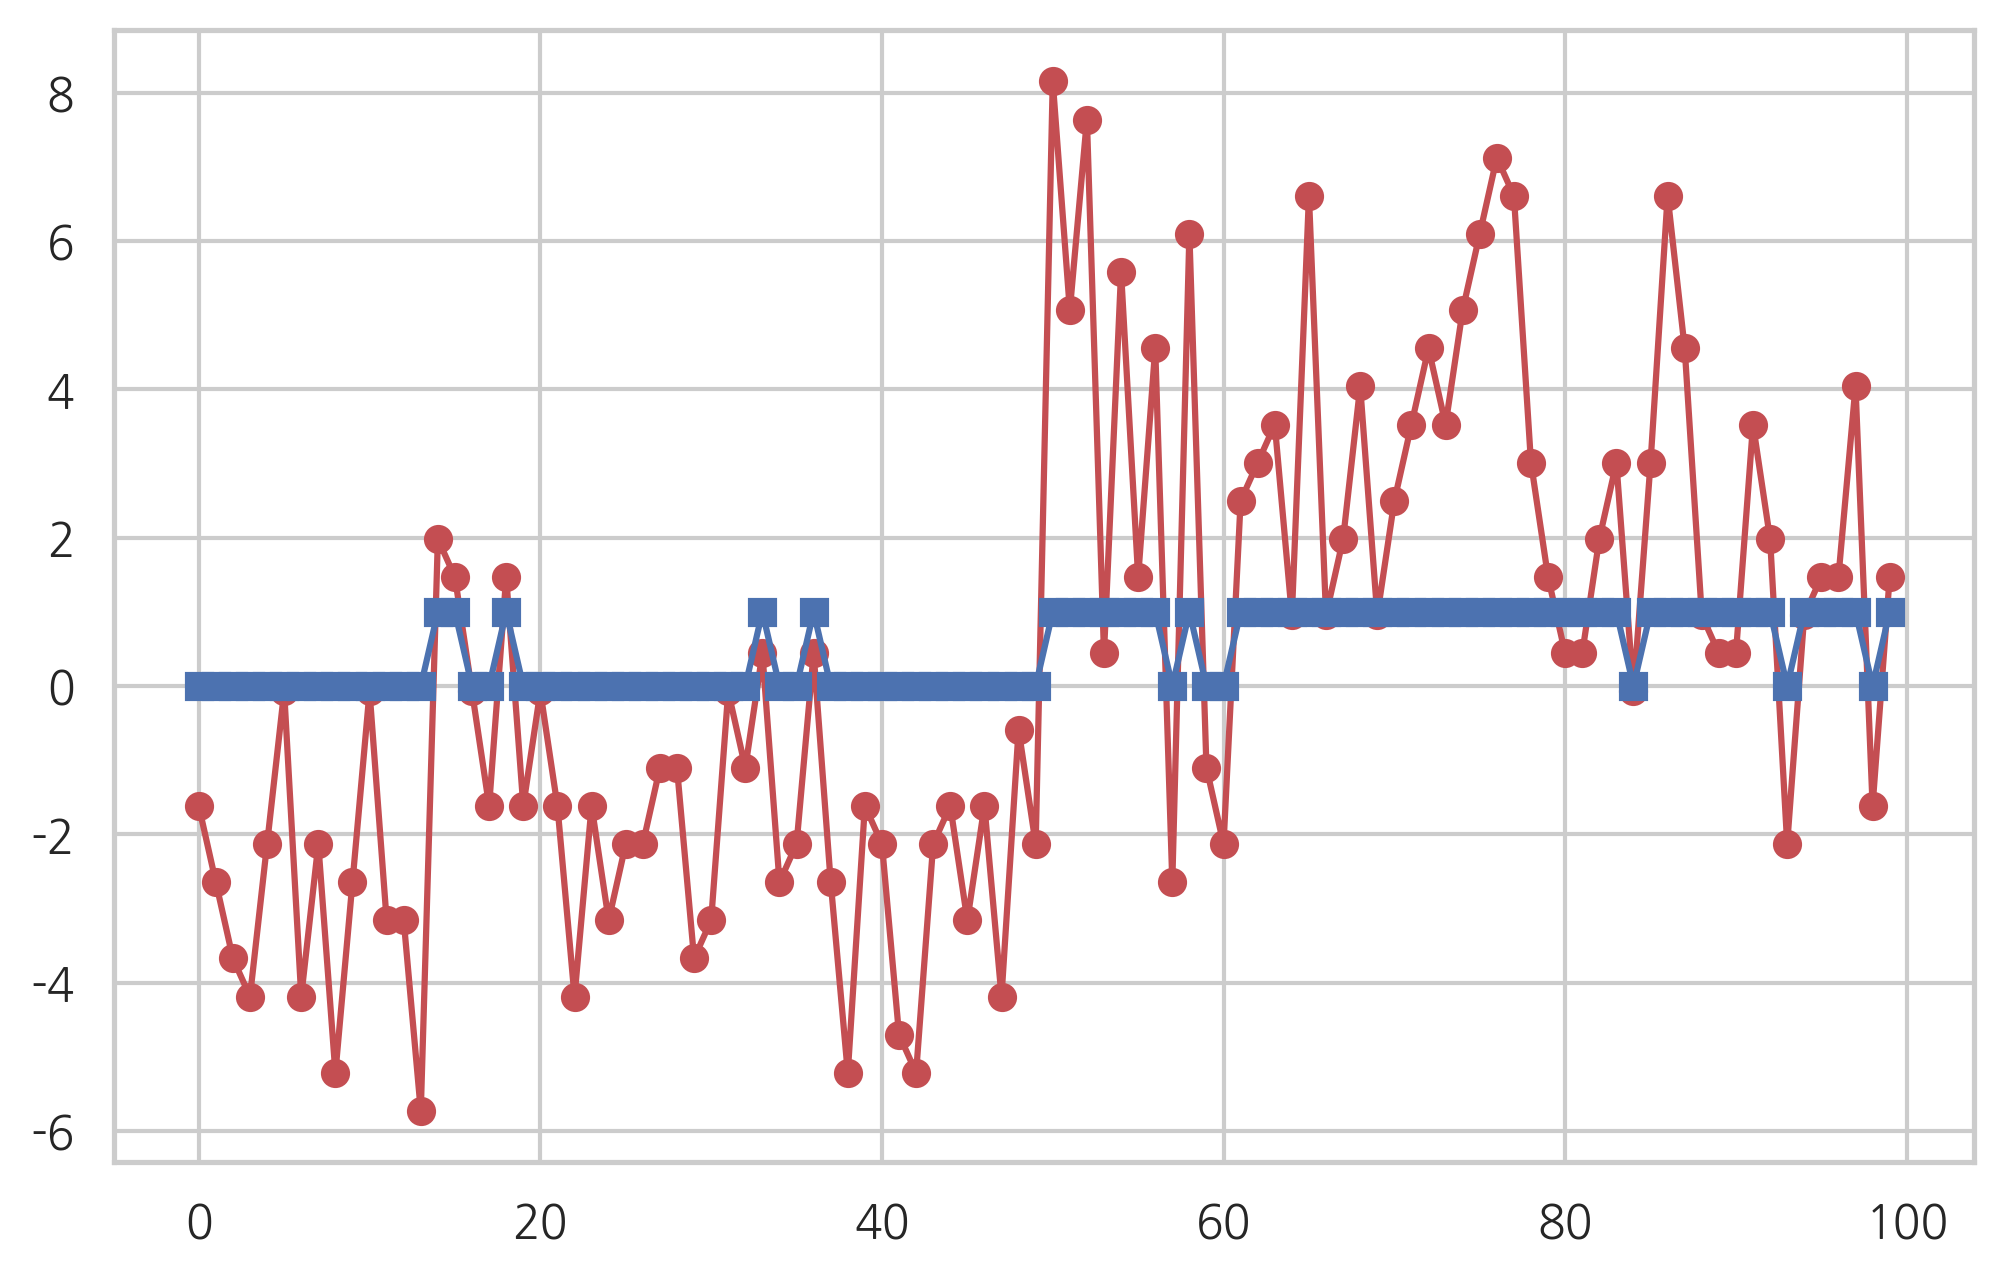

In [39]:
plt.plot(logit_res.fittedvalues, "ro-")
plt.plot(y_pred, "bs-")

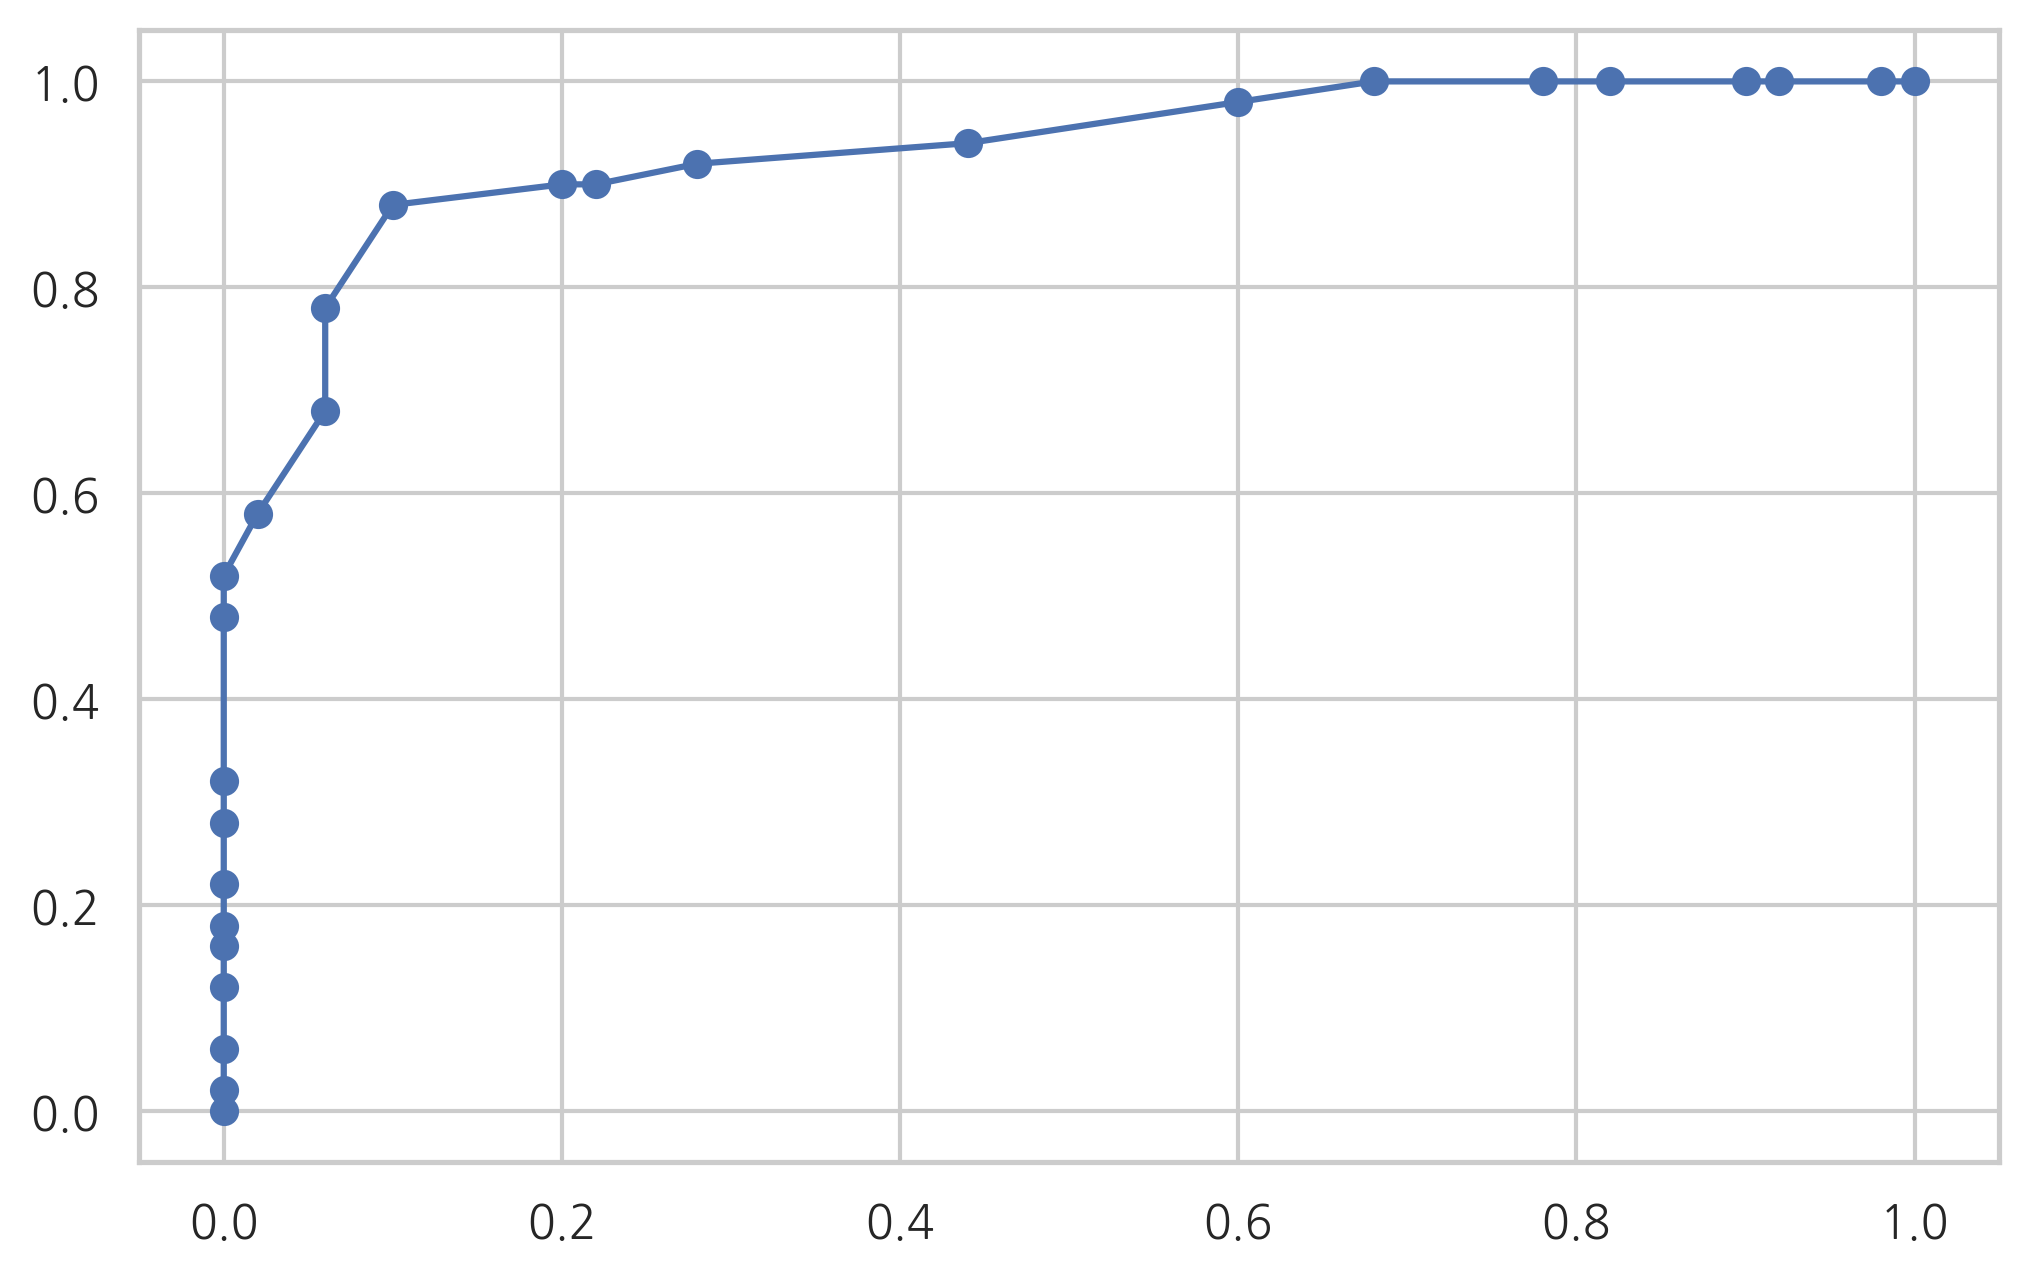

In [40]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y, logit_res.fittedvalues)

plt.plot(fpr, tpr, 'o-')
plt.show()

In [41]:
# 연습문제 2 답

In [42]:
from sklearn.datasets import load_iris

iris = load_iris()
idx = np.in1d(iris.target, [1, 2])
X0 = pd.DataFrame(iris.data[idx, :], columns=iris.feature_names[:])
X = sm.add_constant(X0)
y = iris.target[idx] - 1

In [43]:
logit_mod = sm.Logit(y, X)
logit_res = logit_mod.fit(disp=1)
print(logit_res.summary())

Optimization terminated successfully.
         Current function value: 0.059493
         Iterations 12
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                  100
Model:                          Logit   Df Residuals:                       95
Method:                           MLE   Df Model:                            4
Date:                Sat, 06 Jun 2020   Pseudo R-squ.:                  0.9142
Time:                        10:02:15   Log-Likelihood:                -5.9493
converged:                       True   LL-Null:                       -69.315
Covariance Type:            nonrobust   LLR p-value:                 1.947e-26
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const               -42.6378     25.708     -1.659      0.097     -93.024       7.748
sepal l

In [44]:
y_pred = logit_res.predict(X) >= 0.5

In [45]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y, y_pred)

array([[49,  1],
       [ 1, 49]])

In [46]:
from sklearn.metrics import classification_report

print(classification_report(y, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98        50
           1       0.98      0.98      0.98        50

    accuracy                           0.98       100
   macro avg       0.98      0.98      0.98       100
weighted avg       0.98      0.98      0.98       100

